In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import skew
from scipy.stats import norm,kurtosis
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.ticker as ticker  
from sklearn.metrics import r2_score 
from prettytable import PrettyTable 

In [2]:
da=xr.open_dataset("/vftmp/Olivia.Mcredmond/data/model_timeseries_odiv2.nc",decode_times=True)
ds=xr.open_dataset("/vftmp/Olivia.Mcredmond/data/model_timeseries_odiv181.nc",decode_times=True)
odiv181_pressure= xr.open_dataset("/work4/k2t/sealevel/data/model_timeseries_psl_odiv181.nc")
odiv2_pressure= xr.open_dataset("/work4/k2t/sealevel/data/model_timeseries_psl_odiv2.nc")
obs_sandyhook= xr.open_dataset("/vftmp/Olivia.Mcredmond/data/cdf files/SandyHook(1958-2017).cdf",decode_times=True)
obs_seattle= xr.open_dataset("/vftmp/Olivia.Mcredmond/data/cdf files/Seattle(1958-2017).cdf",decode_times=True)
obs_wellington= xr.open_dataset("/vftmp/Olivia.Mcredmond/data/cdf files/Wellington(1958-2017).cdf",decode_times=True)
obs_kushimoto= xr.open_dataset("/vftmp/Olivia.Mcredmond/data/cdf files/kushimoto.cdf",decode_times=True)

## Time slicing and preprocessing

In [3]:
year_start=1958
year_end=2014

In [4]:
# model time slice and subtract mean
seattle_2= da.SEATTLE.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
seattle_2=seattle_2-seattle_2.mean()
seattle_181= ds.SEATTLE.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
seattle_181=seattle_181-seattle_181.mean()

sandyhook_2= da.SANDY_HOOK.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
sandyhook_2=sandyhook_2-sandyhook_2.mean()
sandyhook_181= ds.SANDY_HOOK.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
sandyhook_181=sandyhook_181-sandyhook_181.mean()

wellington_2= da.WELLINGTON_HARBOUR.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
wellington_2=wellington_2-wellington_2.mean()
wellington_181= ds.WELLINGTON_HARBOUR.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
wellington_181=wellington_181-wellington_181.mean()

kushimoto_2= da.KUSHIMOTO.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
kushimoto_2=kushimoto_2-kushimoto_2.mean()
kushimoto_181= ds.KUSHIMOTO.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
kushimoto_181=kushimoto_181-kushimoto_181.mean()

In [5]:
#pressure time slice and subtract mean 
# Pascal to millibars= *0.1
# centimeters to meters= *0.1
# wanter density=1.02 
# g=9.8

seattle_psl2 = -1*(odiv2_pressure.SEATTLE.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31")))*0.01*0.1/(1.02*9.8)
seattle_psl2 = seattle_2+(seattle_psl2-seattle_psl2.mean())
seattle_psl181=-1*(odiv181_pressure.SEATTLE.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31")))*0.01*0.1/(1.02*9.8)
seattle_psl181 = seattle_181+np.array(seattle_psl181-seattle_psl181.mean())

sandyhook_psl2 =-1* (odiv2_pressure.SANDY_HOOK.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31")))*0.01*0.1/(1.02*9.8)
sandyhook_psl2 = sandyhook_2+(sandyhook_psl2-sandyhook_psl2.mean())
sandyhook_psl181 = -1*(odiv181_pressure.SANDY_HOOK.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31")))*0.01*0.1/(1.02*9.8)
sandyhook_psl181 = sandyhook_181+(np.array(sandyhook_psl181-sandyhook_psl181.mean()))

wellington_psl2 =-1* (odiv2_pressure.WELLINGTON_HARBOUR.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31")))*0.01*0.1/(1.02*9.8)
wellington_psl2 = wellington_2+(wellington_psl2-wellington_psl2.mean())
wellington_psl181 = -1*(odiv181_pressure.WELLINGTON_HARBOUR.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31")))*0.01*0.1/(1.02*9.8)
wellington_psl181 = wellington_181+np.array(wellington_psl181-wellington_psl181.mean())

kushimoto_psl2 =-1* (odiv2_pressure.KUSHIMOTO.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31")))*0.01*0.1/(1.02*9.8)
kushimoto_psl2 = kushimoto_2+(kushimoto_psl2-kushimoto_psl2.mean())
kushimoto_psl181 = -1*(odiv181_pressure.KUSHIMOTO.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31")))*0.01*0.1/(1.02*9.8)
kushimoto_psl181 = kushimoto_181+np.array(kushimoto_psl181-kushimoto_psl181.mean())

In [6]:
#obs time slice
seattle_obs=obs_seattle.sel(datetime=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
seattle_obs['sealevel_tr']=seattle_obs.sealevel_tr-seattle_obs.sealevel_tr.mean()
sandyhook_obs=obs_sandyhook.sel(datetime=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
sandyhook_obs['sealevel_tr']=sandyhook_obs.sealevel_tr-sandyhook_obs.sealevel_tr.mean()
wellington_obs=obs_wellington.sel(datetime=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
wellington_obs['sealevel_tr']=wellington_obs.sealevel_tr-wellington_obs.sealevel_tr.mean()
kushimoto_obs=obs_kushimoto.sel(datetime=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
kushimoto_obs['sealevel_tr']=kushimoto_obs.sealevel_tr-kushimoto_obs.sealevel_tr.mean()

## Plots

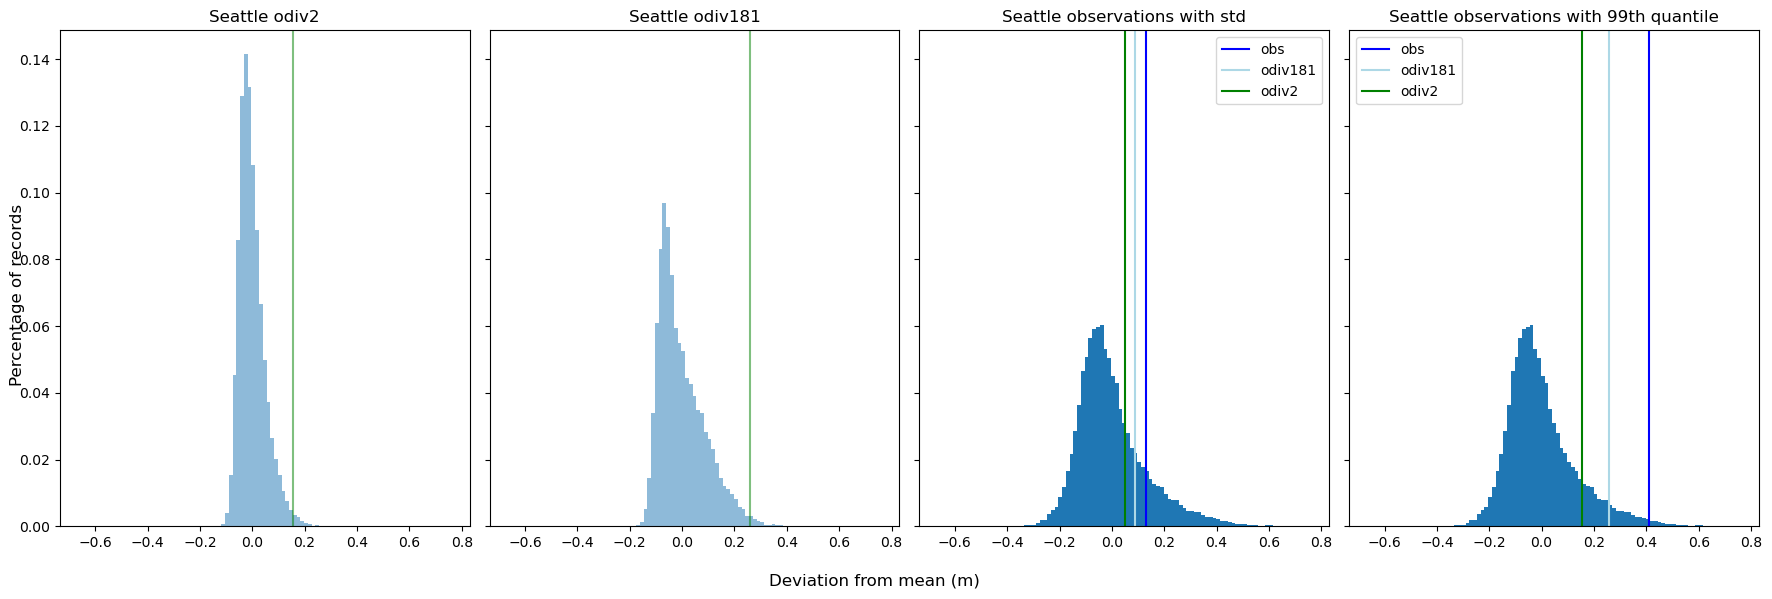

+---------------+------------------------+-------+----------+-------------------+
| Figure Origin | Standard Deviation (m) |  Skew | Kurtosis | 99th Quantile (m) |
+---------------+------------------------+-------+----------+-------------------+
|    Odiv 181   |         0.088          | 0.984 |  0.657   |       0.259       |
|     Odiv 2    |          0.05          | 1.086 |  1.735   |       0.155       |
|  Observations |         0.131          | 1.064 |  1.669   |       0.409       |
+---------------+------------------------+-------+----------+-------------------+


/vftmp/Olivia.Mcredmond/pid217531/ipykernel_219701/1577475253.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myTable.add_row(["Observations", f"{round(float(seattle_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(seattle_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(seattle_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(seattle_obs.sealevel_tr.quantile(0.99)),3)}"])


In [7]:
bins=np.linspace(np.float64(seattle_obs.sealevel_tr.min()),np.float64(seattle_obs.sealevel_tr.max()), 100)
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, tight_layout=True, figsize=(18,6))

axs[0].hist(seattle_2, bins=bins, weights=1/len(seattle_2) * np.ones(len(seattle_2)),alpha=0.5, label='odiv2')
axs[0].axvline(seattle_2.quantile(0.99), alpha=0.5, color='green', label='odiv2 q99')
axs[0].set_title('Seattle odiv2')


axs[1].hist(seattle_181, bins=bins, weights=1/len(seattle_181) * np.ones(len(seattle_181)),alpha=0.5, label='odiv181')
axs[1].axvline(seattle_181.quantile(0.99), alpha=0.5, color='green',  label='odiv181 q99')
axs[1].set_title('Seattle odiv181')


axs[2].hist(seattle_obs.sealevel_tr, bins=bins, weights=1/len(seattle_obs.sealevel_tr) * np.ones(len(seattle_obs.sealevel_tr)))
axs[2].set_title('Seattle observations with std')

axs[2].axvline(seattle_obs.sealevel_tr.std(), color='blue', label='obs')
axs[2].axvline(seattle_181.std(), color='lightblue', label='odiv181')
axs[2].axvline(seattle_2.std(), color='green', label='odiv2')
axs[2].legend()

axs[3].hist(seattle_obs.sealevel_tr, bins=bins, weights=1/len(seattle_obs.sealevel_tr) * np.ones(len(seattle_obs.sealevel_tr)))
axs[3].set_title('Seattle observations with 99th quantile')

axs[3].axvline(seattle_obs.sealevel_tr.quantile(0.99), color='blue', label='obs')
axs[3].axvline(seattle_181.quantile(0.99), color='lightblue', label='odiv181')
axs[3].axvline(seattle_2.quantile(0.99), color='green', label='odiv2')
axs[3].legend()

fig.supylabel('Percentage of records')
fig.supxlabel('Deviation from mean (m)')
plt.show()
 
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Figure Origin", "Standard Deviation (m)", "Skew", "Kurtosis", "99th Quantile (m)"]) 
 
# Add rows 
myTable.add_row(["Odiv 181", f"{round(float(seattle_181.std()), 3)}", f"{round(float(skew(seattle_181, bias=False)), 3)}", f"{round(float(kurtosis(seattle_181, bias=False)), 3)}", f"{round(float(seattle_181.quantile(0.99)),3)}"]) 
myTable.add_row(["Odiv 2",f"{round(float(seattle_2.std()), 3)}", f"{round(float(skew(seattle_2, bias=False)), 3)}", f"{round(float(kurtosis(seattle_2, bias=False)), 3)}", f"{round(float(seattle_2.quantile(0.99)),3)}"]) 
myTable.add_row(["Observations", f"{round(float(seattle_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(seattle_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(seattle_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(seattle_obs.sealevel_tr.quantile(0.99)),3)}"]) 

print(myTable)

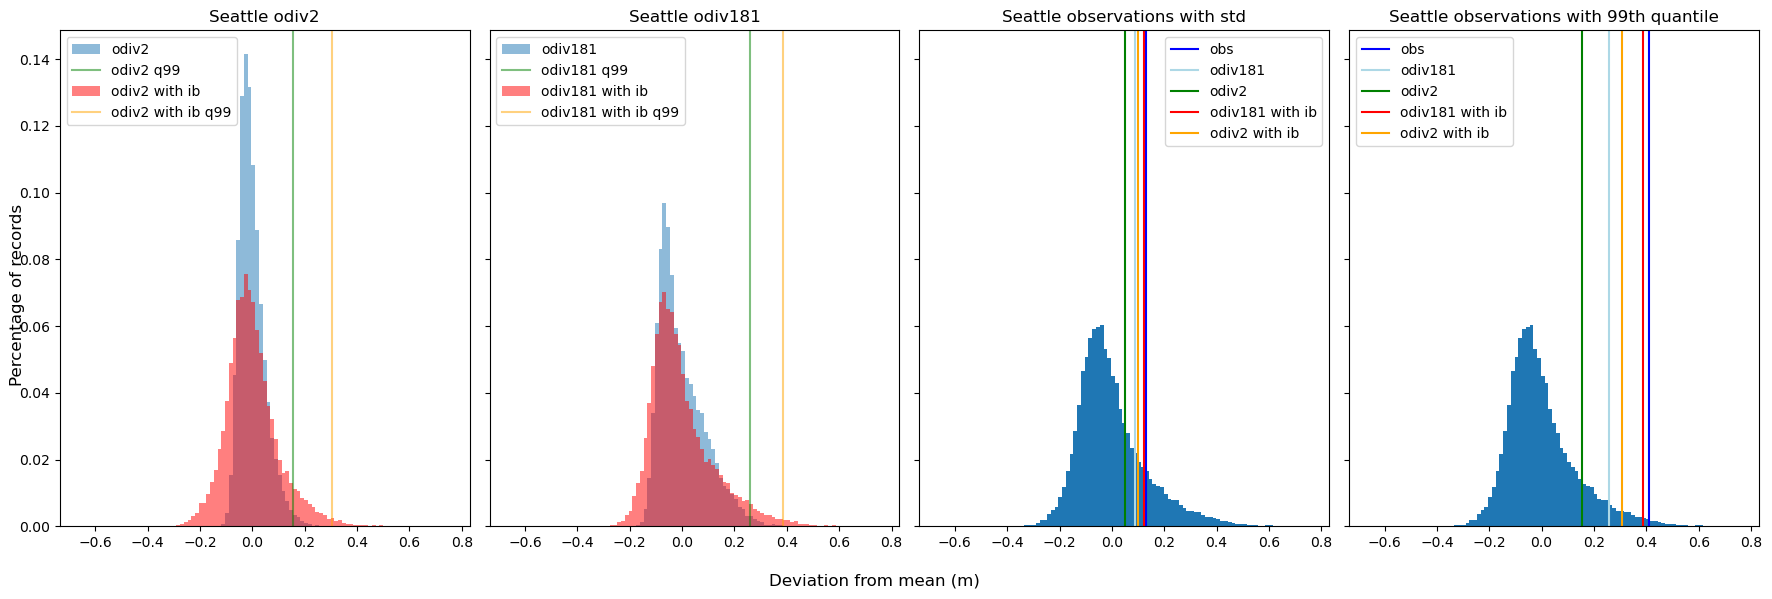

/vftmp/Olivia.Mcredmond/pid217531/ipykernel_219701/2140247579.py:56: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myTable.add_row(["Observations", f"{round(float(seattle_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(seattle_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(seattle_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(seattle_obs.sealevel_tr.quantile(0.99)),3)}"])


+------------------+------------------------+-------+----------+-------------------+
|  Figure Source   | Standard Deviation (m) |  Skew | Kurtosis | 99th Quantile (m) |
+------------------+------------------------+-------+----------+-------------------+
|     Odiv 181     |         0.088          | 0.984 |  0.657   |       0.259       |
|      Odiv 2      |          0.05          | 1.086 |  1.735   |       0.155       |
| Odiv 181 with IB |         0.121          | 0.801 |  1.665   |       0.387       |
|  Odiv 2 with IB  |         0.101          | 1.183 |  1.656   |       0.306       |
|   Observations   |         0.131          | 1.064 |  1.669   |       0.409       |
+------------------+------------------------+-------+----------+-------------------+


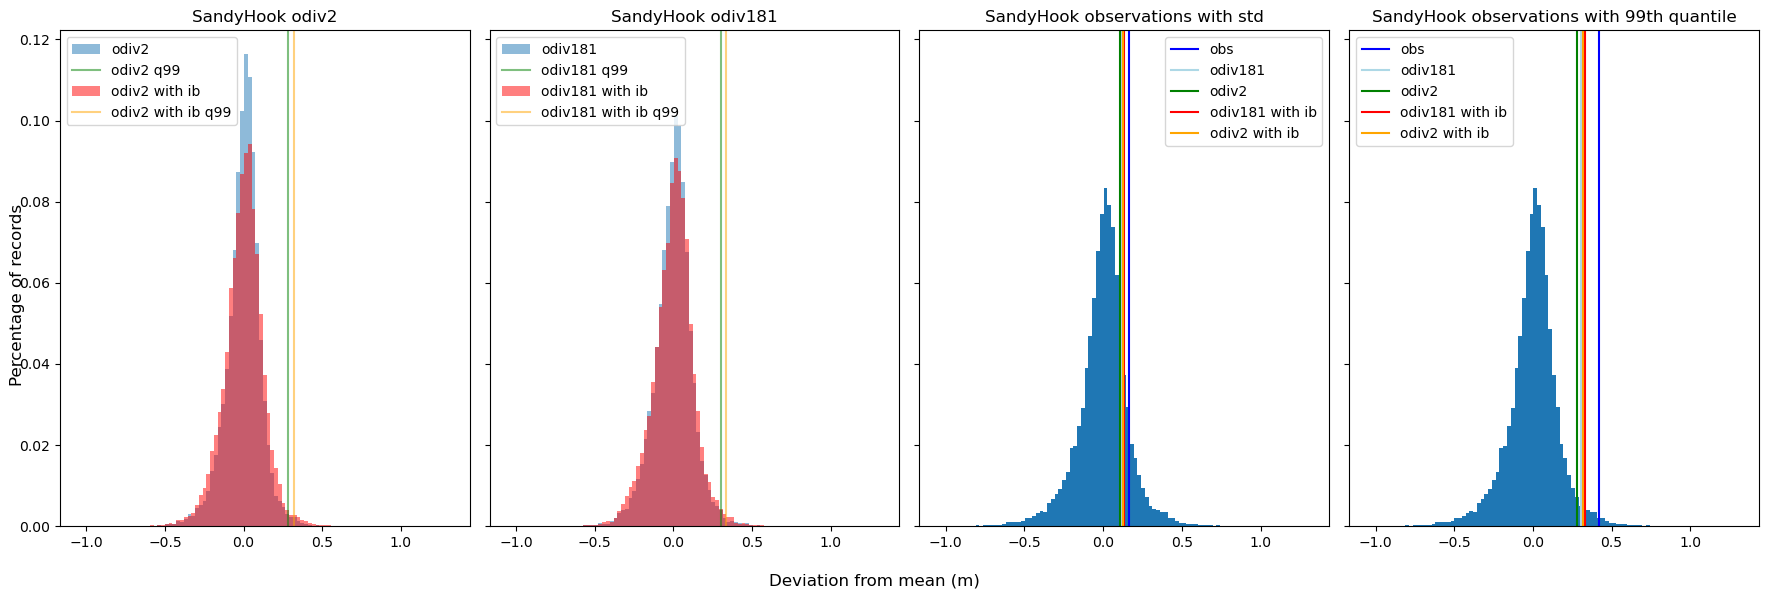

/vftmp/Olivia.Mcredmond/pid217531/ipykernel_219701/2140247579.py:114: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myTable.add_row(["Observations", f"{round(float(sandyhook_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(sandyhook_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(sandyhook_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(sandyhook_obs.sealevel_tr.quantile(0.99)),3)}"])


+------------------+------------------------+--------+----------+-------------------+
|  Figure Source   | Standard Deviation (m) |  Skew  | Kurtosis | 99th Quantile (m) |
+------------------+------------------------+--------+----------+-------------------+
|     Odiv 181     |         0.121          | -0.154 |  1.949   |       0.302       |
|      Odiv 2      |          0.11          | -0.432 |  2.466   |        0.28       |
| Odiv 181 with IB |         0.131          | -0.183 |  1.857   |       0.332       |
|  Odiv 2 with IB  |         0.125          | -0.02  |  1.683   |        0.32       |
|   Observations   |         0.162          | -0.284 |  3.497   |       0.422       |
+------------------+------------------------+--------+----------+-------------------+


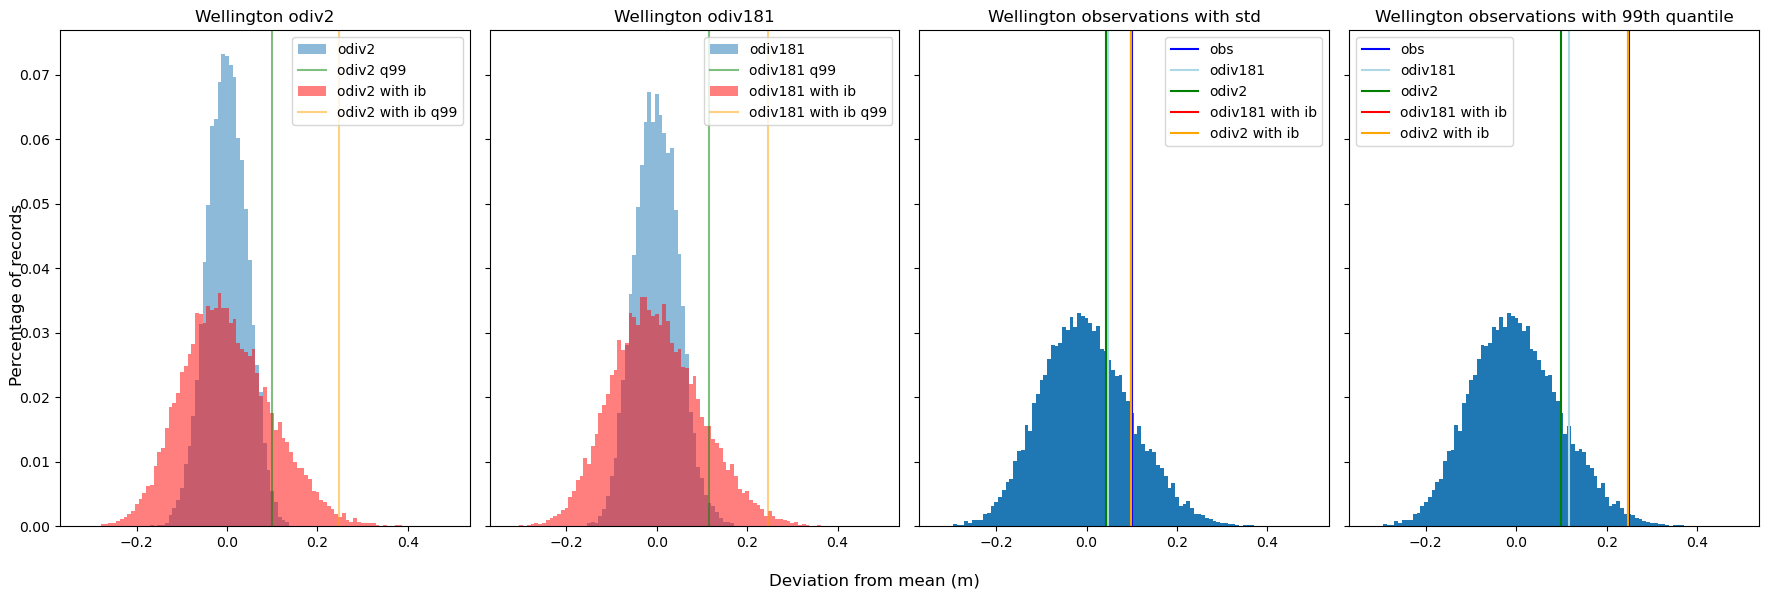

/vftmp/Olivia.Mcredmond/pid217531/ipykernel_219701/2140247579.py:173: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myTable.add_row(["Observations", f"{round(float(wellington_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(wellington_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(wellington_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(wellington_obs.sealevel_tr.quantile(0.99)),3)}"])


+------------------+------------------------+--------+----------+-------------------+
|  Figure Source   | Standard Deviation (m) |  Skew  | Kurtosis | 99th Quantile (m) |
+------------------+------------------------+--------+----------+-------------------+
|     Odiv 181     |         0.048          | 0.116  |  -0.058  |       0.117       |
|      Odiv 2      |         0.044          | -0.028 |  -0.119  |       0.099       |
| Odiv 181 with IB |         0.098          | 0.347  |  -0.018  |       0.247       |
|  Odiv 2 with IB  |         0.098          | 0.284  |  0.052   |       0.248       |
|   Observations   |          0.1           | 0.261  |  -0.024  |       0.249       |
+------------------+------------------------+--------+----------+-------------------+


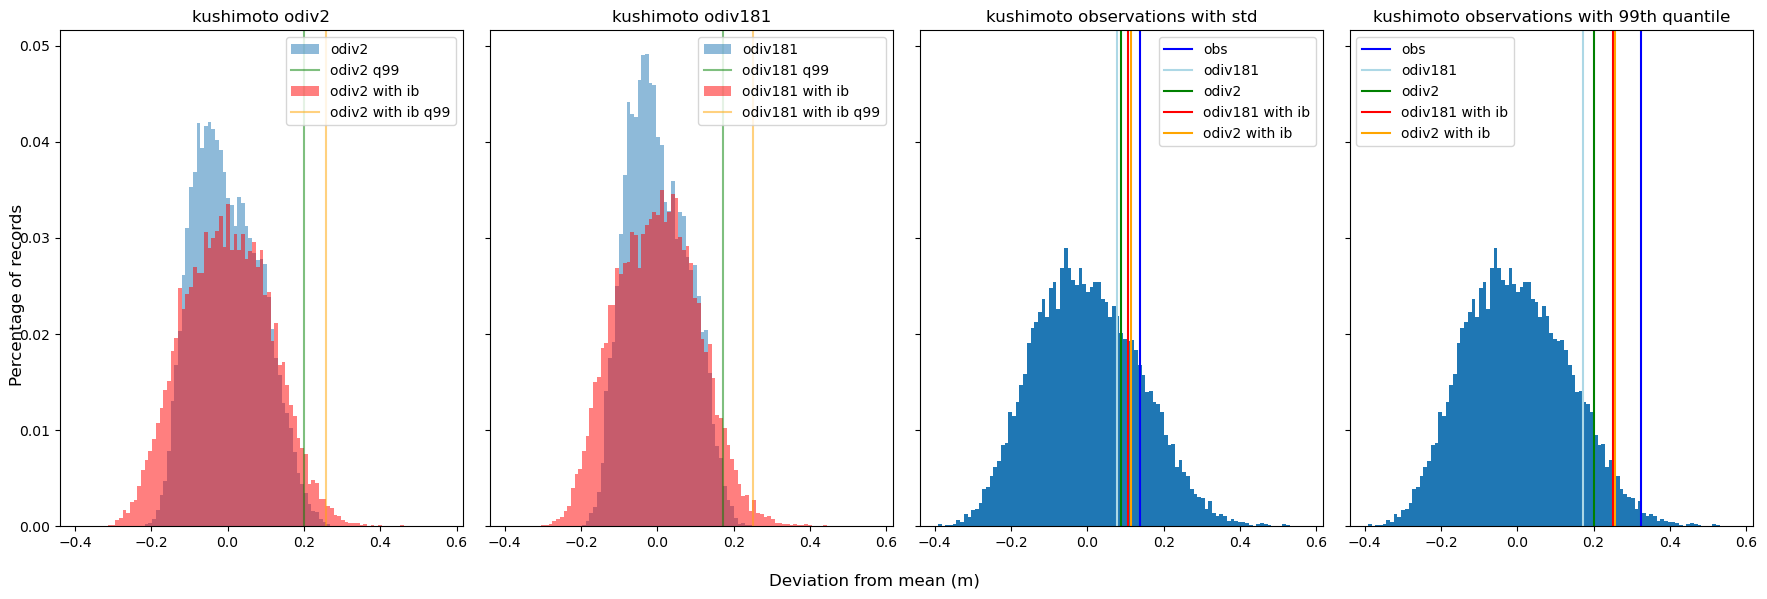

+------------------+------------------------+-------+----------+-------------------+
|  Figure Source   | Standard Deviation (m) |  Skew | Kurtosis | 99th Quantile (m) |
+------------------+------------------------+-------+----------+-------------------+
|     Odiv 181     |         0.078          | 0.261 |  -0.674  |       0.172       |
|      Odiv 2      |         0.087          | 0.295 |  -0.633  |       0.201       |
| Odiv 181 with IB |         0.107          | 0.099 |  -0.256  |       0.251       |
|  Odiv 2 with IB  |         0.113          | 0.156 |  -0.355  |       0.257       |
|   Observations   |         0.137          | 0.244 |  -0.249  |       0.324       |
+------------------+------------------------+-------+----------+-------------------+


/vftmp/Olivia.Mcredmond/pid217531/ipykernel_219701/2140247579.py:230: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myTable.add_row(["Observations", f"{round(float(kushimoto_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(kushimoto_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(kushimoto_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(kushimoto_obs.sealevel_tr.quantile(0.99)),3)}"])


In [8]:
## COPY THIS AND REPLACE WITH CHOSEN LOCATION NAME[20819
######################################################
bins=np.linspace(np.float64(seattle_obs.sealevel_tr.min()),np.float64(seattle_obs.sealevel_tr.max()), 100)
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, tight_layout=True, figsize=(18,6))

axs[0].hist(seattle_2, bins=bins, weights=1/len(seattle_2) * np.ones(len(seattle_2)),alpha=0.5, label='odiv2')
axs[0].axvline(seattle_2.quantile(0.99), alpha=0.5, color='green', label='odiv2 q99')
axs[0].set_title('Seattle odiv2')

axs[0].hist(seattle_psl2, bins=bins, weights=1/len(seattle_psl2) * np.ones(len(seattle_psl2)), color='red',alpha=0.5,  label='odiv2 with ib')
axs[0].axvline(seattle_psl2.quantile(0.99), alpha=0.5, color='orange', label='odiv2 with ib q99')
axs[0].set_title('Seattle odiv2')
axs[0].legend()

axs[1].hist(seattle_181, bins=bins, weights=1/len(seattle_181) * np.ones(len(seattle_181)),alpha=0.5, label='odiv181')
axs[1].axvline(seattle_181.quantile(0.99), alpha=0.5, color='green',  label='odiv181 q99')
axs[1].set_title('Seattle odiv181')

axs[1].hist(seattle_psl181, bins=bins, color='red',alpha=0.5, weights=1/len(seattle_psl181) * np.ones(len(seattle_psl181)), label='odiv181 with ib')
axs[1].axvline(seattle_psl181.quantile(0.99), alpha=0.5, color='orange', label='odiv181 with ib q99')
axs[1].set_title('Seattle odiv181')
axs[1].legend()

axs[2].hist(seattle_obs.sealevel_tr, bins=bins, weights=1/len(seattle_obs.sealevel_tr) * np.ones(len(seattle_obs.sealevel_tr)))
axs[2].set_title('Seattle observations with std')

axs[2].axvline(seattle_obs.sealevel_tr.std(), color='blue', label='obs')
axs[2].axvline(seattle_181.std(), color='lightblue', label='odiv181')
axs[2].axvline(seattle_2.std(), color='green', label='odiv2')
axs[2].axvline(seattle_psl181.std(), color='red', label='odiv181 with ib')
axs[2].axvline(seattle_psl2.std(), color='orange',label='odiv2 with ib')
axs[2].legend()

axs[3].hist(seattle_obs.sealevel_tr, bins=bins, weights=1/len(seattle_obs.sealevel_tr) * np.ones(len(seattle_obs.sealevel_tr)))
axs[3].set_title('Seattle observations with 99th quantile')

axs[3].axvline(seattle_obs.sealevel_tr.quantile(0.99), color='blue', label='obs')
axs[3].axvline(seattle_181.quantile(0.99), color='lightblue', label='odiv181')
axs[3].axvline(seattle_2.quantile(0.99), color='green', label='odiv2')
axs[3].axvline(seattle_psl181.quantile(0.99), color='red', label='odiv181 with ib')
axs[3].axvline(seattle_psl2.quantile(0.99), color='orange',label='odiv2 with ib')
axs[3].legend()

fig.supylabel('Percentage of records')
fig.supxlabel('Deviation from mean (m)')
plt.show()
 
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Figure Source", "Standard Deviation (m)", "Skew", "Kurtosis", "99th Quantile (m)"]) 
 
# Add rows 
myTable.add_row(["Odiv 181", f"{round(float(seattle_181.std()), 3)}", f"{round(float(skew(seattle_181, bias=False)), 3)}", f"{round(float(kurtosis(seattle_181, bias=False)), 3)}", f"{round(float(seattle_181.quantile(0.99)),3)}"]) 
myTable.add_row(["Odiv 2",f"{round(float(seattle_2.std()), 3)}", f"{round(float(skew(seattle_2, bias=False)), 3)}", f"{round(float(kurtosis(seattle_2, bias=False)), 3)}", f"{round(float(seattle_2.quantile(0.99)),3)}"]) 
myTable.add_row(["Odiv 181 with IB", f"{round(float(seattle_psl181.std()), 3)}", f"{round(float(skew(seattle_psl2, bias=False)), 3)}", f"{round(float(kurtosis(seattle_psl181, bias=False)), 3)}", f"{round(float(seattle_psl181.quantile(0.99)),3)}"]) 
myTable.add_row(["Odiv 2 with IB", f"{round(float(seattle_psl2.std()), 3)}", f"{round(float(skew(seattle_psl181, bias=False)), 3)}", f"{round(float(kurtosis(seattle_psl2, bias=False)), 3)}", f"{round(float(seattle_psl2.quantile(0.99)),3)}"]) 
myTable.add_row(["Observations", f"{round(float(seattle_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(seattle_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(seattle_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(seattle_obs.sealevel_tr.quantile(0.99)),3)}"]) 

print(myTable)
################################################################################

bins=np.linspace(np.float64(sandyhook_obs.sealevel_tr.min()),np.float64(sandyhook_obs.sealevel_tr.max()), 100)
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, tight_layout=True, figsize=(18,6))

axs[0].hist(sandyhook_2, bins=bins, weights=1/len(sandyhook_2) * np.ones(len(sandyhook_2)),alpha=0.5, label='odiv2')
axs[0].axvline(sandyhook_2.quantile(0.99), alpha=0.5, color='green', label='odiv2 q99')
axs[0].set_title('SandyHook odiv2')

axs[0].hist(sandyhook_psl2, bins=bins, weights=1/len(sandyhook_psl2) * np.ones(len(sandyhook_psl2)), color='red',alpha=0.5,  label='odiv2 with ib')
axs[0].axvline(sandyhook_psl2.quantile(0.99), alpha=0.5, color='orange', label='odiv2 with ib q99')
axs[0].set_title('SandyHook odiv2')
axs[0].legend()

axs[1].hist(sandyhook_181, bins=bins, weights=1/len(sandyhook_181) * np.ones(len(sandyhook_181)),alpha=0.5, label='odiv181')
axs[1].axvline(sandyhook_181.quantile(0.99), alpha=0.5, color='green',  label='odiv181 q99')
axs[1].set_title('SandyHook odiv181')

axs[1].hist(sandyhook_psl181, bins=bins, color='red',alpha=0.5, weights=1/len(sandyhook_psl181) * np.ones(len(sandyhook_psl181)), label='odiv181 with ib')
axs[1].axvline(sandyhook_psl181.quantile(0.99), alpha=0.5, color='orange', label='odiv181 with ib q99')
axs[1].set_title('SandyHook odiv181')
axs[1].legend()

axs[2].hist(sandyhook_obs.sealevel_tr, bins=bins, weights=1/len(sandyhook_obs.sealevel_tr) * np.ones(len(sandyhook_obs.sealevel_tr)))
axs[2].set_title('SandyHook observations with std')

axs[2].axvline(sandyhook_obs.sealevel_tr.std(), color='blue', label='obs')
axs[2].axvline(sandyhook_181.std(), color='lightblue', label='odiv181')
axs[2].axvline(sandyhook_2.std(), color='green', label='odiv2')
axs[2].axvline(sandyhook_psl181.std(), color='red', label='odiv181 with ib')
axs[2].axvline(sandyhook_psl2.std(), color='orange',label='odiv2 with ib')
axs[2].legend()

axs[3].hist(sandyhook_obs.sealevel_tr, bins=bins, weights=1/len(sandyhook_obs.sealevel_tr) * np.ones(len(sandyhook_obs.sealevel_tr)))
axs[3].set_title('SandyHook observations with 99th quantile')

axs[3].axvline(sandyhook_obs.sealevel_tr.quantile(0.99), color='blue', label='obs')
axs[3].axvline(sandyhook_181.quantile(0.99), color='lightblue', label='odiv181')
axs[3].axvline(sandyhook_2.quantile(0.99), color='green', label='odiv2')
axs[3].axvline(sandyhook_psl181.quantile(0.99), color='red', label='odiv181 with ib')
axs[3].axvline(sandyhook_psl2.quantile(0.99), color='orange',label='odiv2 with ib')
axs[3].legend()

fig.supylabel('Percentage of records')
fig.supxlabel('Deviation from mean (m)')
plt.show()

# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Figure Source", "Standard Deviation (m)", "Skew", "Kurtosis", "99th Quantile (m)"]) 
 
# Add rows 
myTable.add_row(["Odiv 181", f"{round(float(sandyhook_181.std()), 3)}", f"{round(float(skew(sandyhook_181, bias=False)), 3)}", f"{round(float(kurtosis(sandyhook_181, bias=False)), 3)}", f"{round(float(sandyhook_181.quantile(0.99)),3)}"]) 
myTable.add_row(["Odiv 2",f"{round(float(sandyhook_2.std()), 3)}", f"{round(float(skew(sandyhook_2, bias=False)), 3)}", f"{round(float(kurtosis(sandyhook_2, bias=False)), 3)}", f"{round(float(sandyhook_2.quantile(0.99)),3)}"]) 
myTable.add_row(["Odiv 181 with IB", f"{round(float(sandyhook_psl181.std()), 3)}", f"{round(float(skew(sandyhook_psl2, bias=False)), 3)}", f"{round(float(kurtosis(sandyhook_psl181, bias=False)), 3)}", f"{round(float(sandyhook_psl181.quantile(0.99)),3)}"]) 
myTable.add_row(["Odiv 2 with IB", f"{round(float(sandyhook_psl2.std()), 3)}", f"{round(float(skew(sandyhook_psl181, bias=False)), 3)}", f"{round(float(kurtosis(sandyhook_psl2, bias=False)), 3)}", f"{round(float(sandyhook_psl2.quantile(0.99)),3)}"]) 
myTable.add_row(["Observations", f"{round(float(sandyhook_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(sandyhook_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(sandyhook_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(sandyhook_obs.sealevel_tr.quantile(0.99)),3)}"]) 

print(myTable)

##################################################################

bins=np.linspace(np.float64(wellington_obs.sealevel_tr.min()),np.float64(wellington_obs.sealevel_tr.max()), 100)
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, tight_layout=True, figsize=(18,6))

axs[0].hist(wellington_2, bins=bins, weights=1/len(wellington_2) * np.ones(len(wellington_2)),alpha=0.5, label='odiv2')
axs[0].axvline(wellington_2.quantile(0.99), alpha=0.5, color='green', label='odiv2 q99')
axs[0].set_title('Wellington odiv2')

axs[0].hist(wellington_psl2, bins=bins, weights=1/len(wellington_psl2) * np.ones(len(wellington_psl2)), color='red',alpha=0.5,  label='odiv2 with ib')
axs[0].axvline(wellington_psl2.quantile(0.99), alpha=0.5, color='orange', label='odiv2 with ib q99')
axs[0].set_title('Wellington odiv2')
axs[0].legend()

axs[1].hist(wellington_181, bins=bins, weights=1/len(wellington_181) * np.ones(len(wellington_181)),alpha=0.5, label='odiv181')
axs[1].axvline(wellington_181.quantile(0.99), alpha=0.5, color='green',  label='odiv181 q99')
axs[1].set_title('Wellington odiv181')

axs[1].hist(wellington_psl181, bins=bins, color='red',alpha=0.5, weights=1/len(wellington_psl181) * np.ones(len(wellington_psl181)), label='odiv181 with ib')
axs[1].axvline(wellington_psl181.quantile(0.99), alpha=0.5, color='orange', label='odiv181 with ib q99')
axs[1].set_title('Wellington odiv181')
axs[1].legend()

axs[2].hist(wellington_obs.sealevel_tr, bins=bins, weights=1/len(wellington_obs.sealevel_tr) * np.ones(len(wellington_obs.sealevel_tr)))
axs[2].set_title('Wellington observations with std')

axs[2].axvline(wellington_obs.sealevel_tr.std(), color='blue', label='obs')
axs[2].axvline(wellington_181.std(), color='lightblue', label='odiv181')
axs[2].axvline(wellington_2.std(), color='green', label='odiv2')
axs[2].axvline(wellington_psl181.std(), color='red', label='odiv181 with ib')
axs[2].axvline(wellington_psl2.std(), color='orange',label='odiv2 with ib')
axs[2].legend()

axs[3].hist(wellington_obs.sealevel_tr, bins=bins, weights=1/len(wellington_obs.sealevel_tr) * np.ones(len(wellington_obs.sealevel_tr)))
axs[3].set_title('Wellington observations with 99th quantile')

axs[3].axvline(wellington_obs.sealevel_tr.quantile(0.99), color='blue', label='obs')
axs[3].axvline(wellington_181.quantile(0.99), color='lightblue', label='odiv181')
axs[3].axvline(wellington_2.quantile(0.99), color='green', label='odiv2')
axs[3].axvline(wellington_psl181.quantile(0.99), color='red', label='odiv181 with ib')
axs[3].axvline(wellington_psl2.quantile(0.99), color='orange',label='odiv2 with ib')
axs[3].legend()

fig.supylabel('Percentage of records')
fig.supxlabel('Deviation from mean (m)')
plt.show()

# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Figure Source", "Standard Deviation (m)", "Skew", "Kurtosis", "99th Quantile (m)"]) 
 
# Add rows 
myTable.add_row(["Odiv 181", f"{round(float(wellington_181.std()), 3)}", f"{round(float(skew(wellington_181, bias=False)), 3)}", f"{round(float(kurtosis(wellington_181, bias=False)), 3)}", f"{round(float(wellington_181.quantile(0.99)),3)}"]) 
myTable.add_row(["Odiv 2",f"{round(float(wellington_2.std()), 3)}", f"{round(float(skew(wellington_2, bias=False)), 3)}", f"{round(float(kurtosis(wellington_2, bias=False)), 3)}", f"{round(float(wellington_2.quantile(0.99)),3)}"]) 
myTable.add_row(["Odiv 181 with IB", f"{round(float(wellington_psl181.std()), 3)}", f"{round(float(skew(wellington_psl2, bias=False)), 3)}", f"{round(float(kurtosis(wellington_psl181, bias=False)), 3)}", f"{round(float(wellington_psl181.quantile(0.99)),3)}"]) 
myTable.add_row(["Odiv 2 with IB", f"{round(float(wellington_psl2.std()), 3)}", f"{round(float(skew(wellington_psl181, bias=False)), 3)}", f"{round(float(kurtosis(wellington_psl2, bias=False)), 3)}", f"{round(float(wellington_psl2.quantile(0.99)),3)}"]) 
myTable.add_row(["Observations", f"{round(float(wellington_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(wellington_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(wellington_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(wellington_obs.sealevel_tr.quantile(0.99)),3)}"]) 

print(myTable)
#################################################################################################################################################
bins=np.linspace(np.float64(kushimoto_obs.sealevel_tr.min()),np.float64(kushimoto_obs.sealevel_tr.max()), 100)
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, tight_layout=True, figsize=(18,6))

axs[0].hist(kushimoto_2, bins=bins, weights=1/len(kushimoto_2) * np.ones(len(kushimoto_2)),alpha=0.5, label='odiv2')
axs[0].axvline(kushimoto_2.quantile(0.99), alpha=0.5, color='green', label='odiv2 q99')
axs[0].set_title('kushimoto odiv2')

axs[0].hist(kushimoto_psl2, bins=bins, weights=1/len(kushimoto_psl2) * np.ones(len(kushimoto_psl2)), color='red',alpha=0.5,  label='odiv2 with ib')
axs[0].axvline(kushimoto_psl2.quantile(0.99), alpha=0.5, color='orange', label='odiv2 with ib q99')
axs[0].set_title('kushimoto odiv2')
axs[0].legend()

axs[1].hist(kushimoto_181, bins=bins, weights=1/len(kushimoto_181) * np.ones(len(kushimoto_181)),alpha=0.5, label='odiv181')
axs[1].axvline(kushimoto_181.quantile(0.99), alpha=0.5, color='green',  label='odiv181 q99')
axs[1].set_title('kushimoto odiv181')

axs[1].hist(kushimoto_psl181, bins=bins, color='red',alpha=0.5, weights=1/len(kushimoto_psl181) * np.ones(len(kushimoto_psl181)), label='odiv181 with ib')
axs[1].axvline(kushimoto_psl181.quantile(0.99), alpha=0.5, color='orange', label='odiv181 with ib q99')
axs[1].set_title('kushimoto odiv181')
axs[1].legend()

axs[2].hist(kushimoto_obs.sealevel_tr, bins=bins, weights=1/len(kushimoto_obs.sealevel_tr) * np.ones(len(kushimoto_obs.sealevel_tr)))
axs[2].set_title('kushimoto observations with std')

axs[2].axvline(kushimoto_obs.sealevel_tr.std(), color='blue', label='obs')
axs[2].axvline(kushimoto_181.std(), color='lightblue', label='odiv181')
axs[2].axvline(kushimoto_2.std(), color='green', label='odiv2')
axs[2].axvline(kushimoto_psl181.std(), color='red', label='odiv181 with ib')
axs[2].axvline(kushimoto_psl2.std(), color='orange',label='odiv2 with ib')
axs[2].legend()

axs[3].hist(kushimoto_obs.sealevel_tr, bins=bins, weights=1/len(kushimoto_obs.sealevel_tr) * np.ones(len(kushimoto_obs.sealevel_tr)))
axs[3].set_title('kushimoto observations with 99th quantile')

axs[3].axvline(kushimoto_obs.sealevel_tr.quantile(0.99), color='blue', label='obs')
axs[3].axvline(kushimoto_181.quantile(0.99), color='lightblue', label='odiv181')
axs[3].axvline(kushimoto_2.quantile(0.99), color='green', label='odiv2')
axs[3].axvline(kushimoto_psl181.quantile(0.99), color='red', label='odiv181 with ib')
axs[3].axvline(kushimoto_psl2.quantile(0.99), color='orange',label='odiv2 with ib')
axs[3].legend()

fig.supylabel('Percentage of records')
fig.supxlabel('Deviation from mean (m)')
plt.show()

# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Figure Source", "Standard Deviation (m)", "Skew", "Kurtosis", "99th Quantile (m)"]) 
 
# Add rows 
myTable.add_row(["Odiv 181", f"{round(float(kushimoto_181.std()), 3)}", f"{round(float(skew(kushimoto_181, bias=False)), 3)}", f"{round(float(kurtosis(kushimoto_181, bias=False)), 3)}", f"{round(float(kushimoto_181.quantile(0.99)),3)}"]) 
myTable.add_row(["Odiv 2",f"{round(float(kushimoto_2.std()), 3)}", f"{round(float(skew(kushimoto_2, bias=False)), 3)}", f"{round(float(kurtosis(kushimoto_2, bias=False)), 3)}", f"{round(float(kushimoto_2.quantile(0.99)),3)}"]) 
myTable.add_row(["Odiv 181 with IB", f"{round(float(kushimoto_psl181.std()), 3)}", f"{round(float(skew(kushimoto_psl2, bias=False)), 3)}", f"{round(float(kurtosis(kushimoto_psl181, bias=False)), 3)}", f"{round(float(kushimoto_psl181.quantile(0.99)),3)}"]) 
myTable.add_row(["Odiv 2 with IB", f"{round(float(kushimoto_psl2.std()), 3)}", f"{round(float(skew(kushimoto_psl181, bias=False)), 3)}", f"{round(float(kurtosis(kushimoto_psl2, bias=False)), 3)}", f"{round(float(kushimoto_psl2.quantile(0.99)),3)}"]) 
myTable.add_row(["Observations", f"{round(float(kushimoto_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(kushimoto_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(kushimoto_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(kushimoto_obs.sealevel_tr.quantile(0.99)),3)}"]) 

print(myTable)

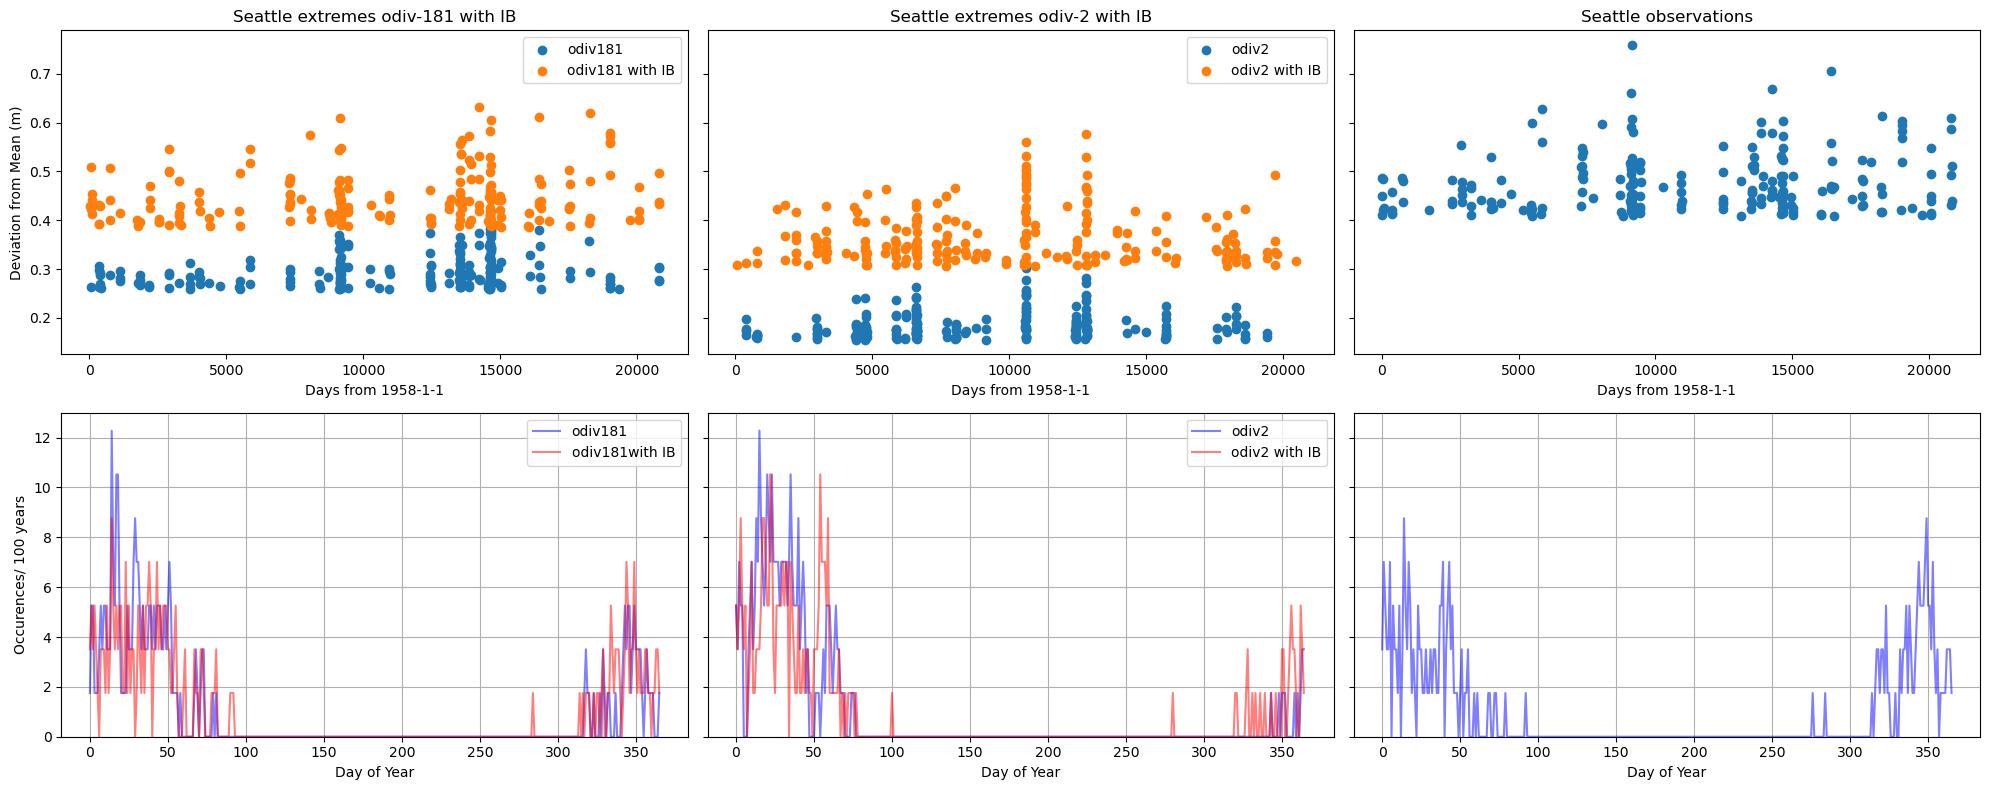

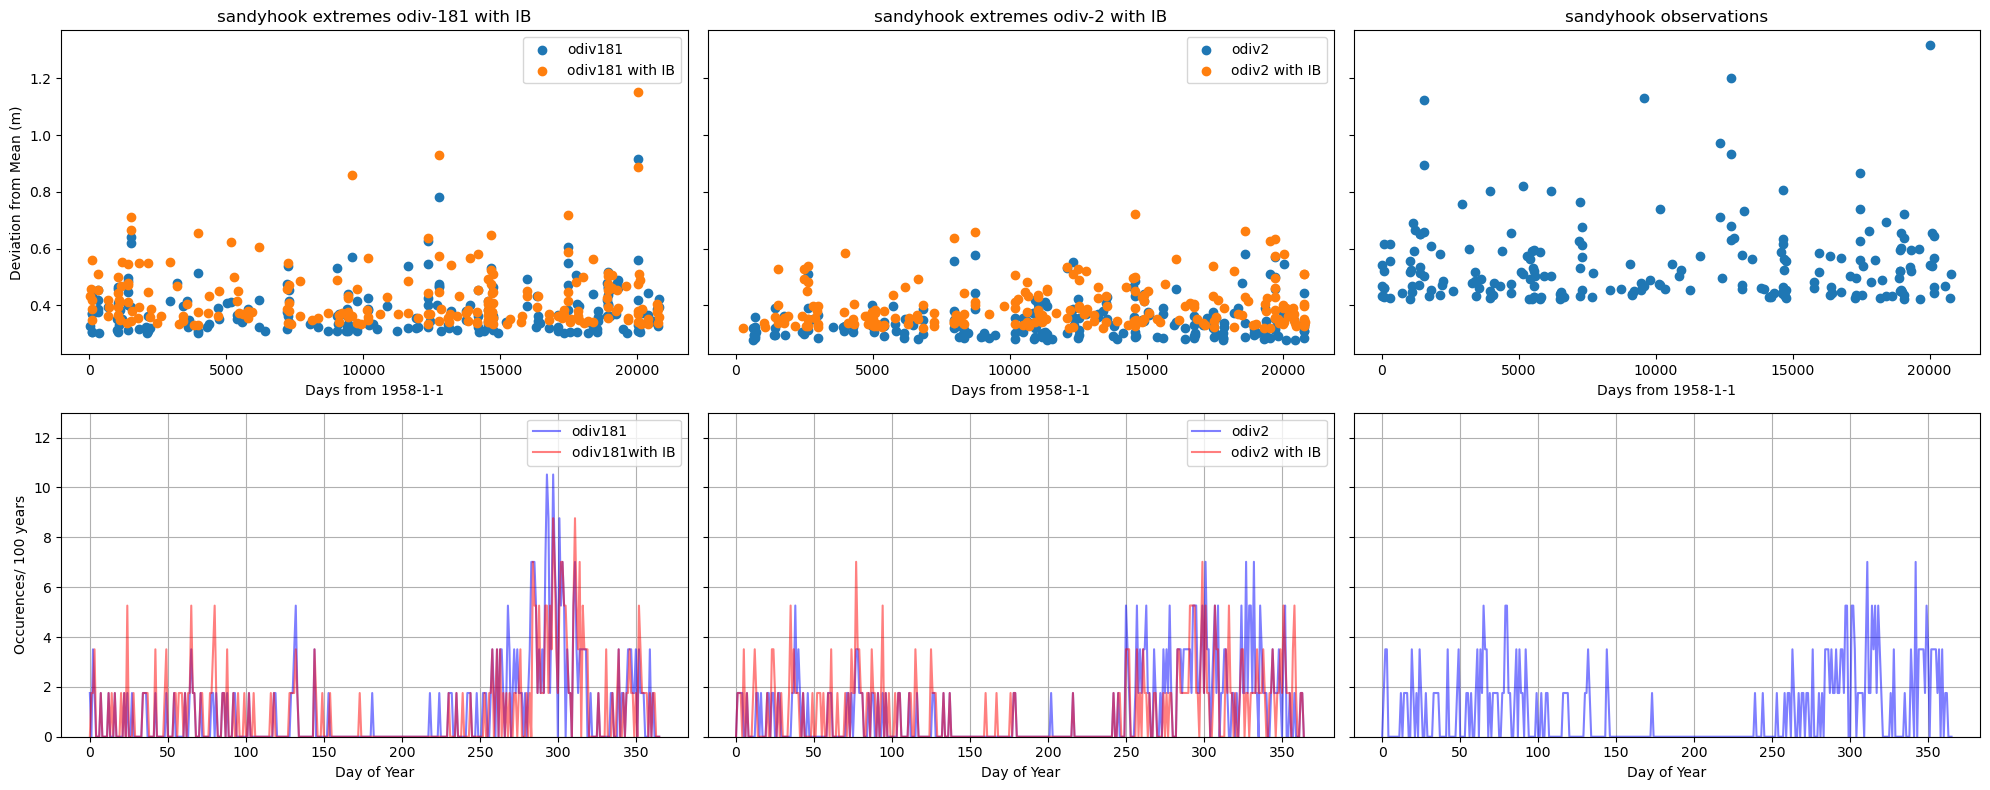

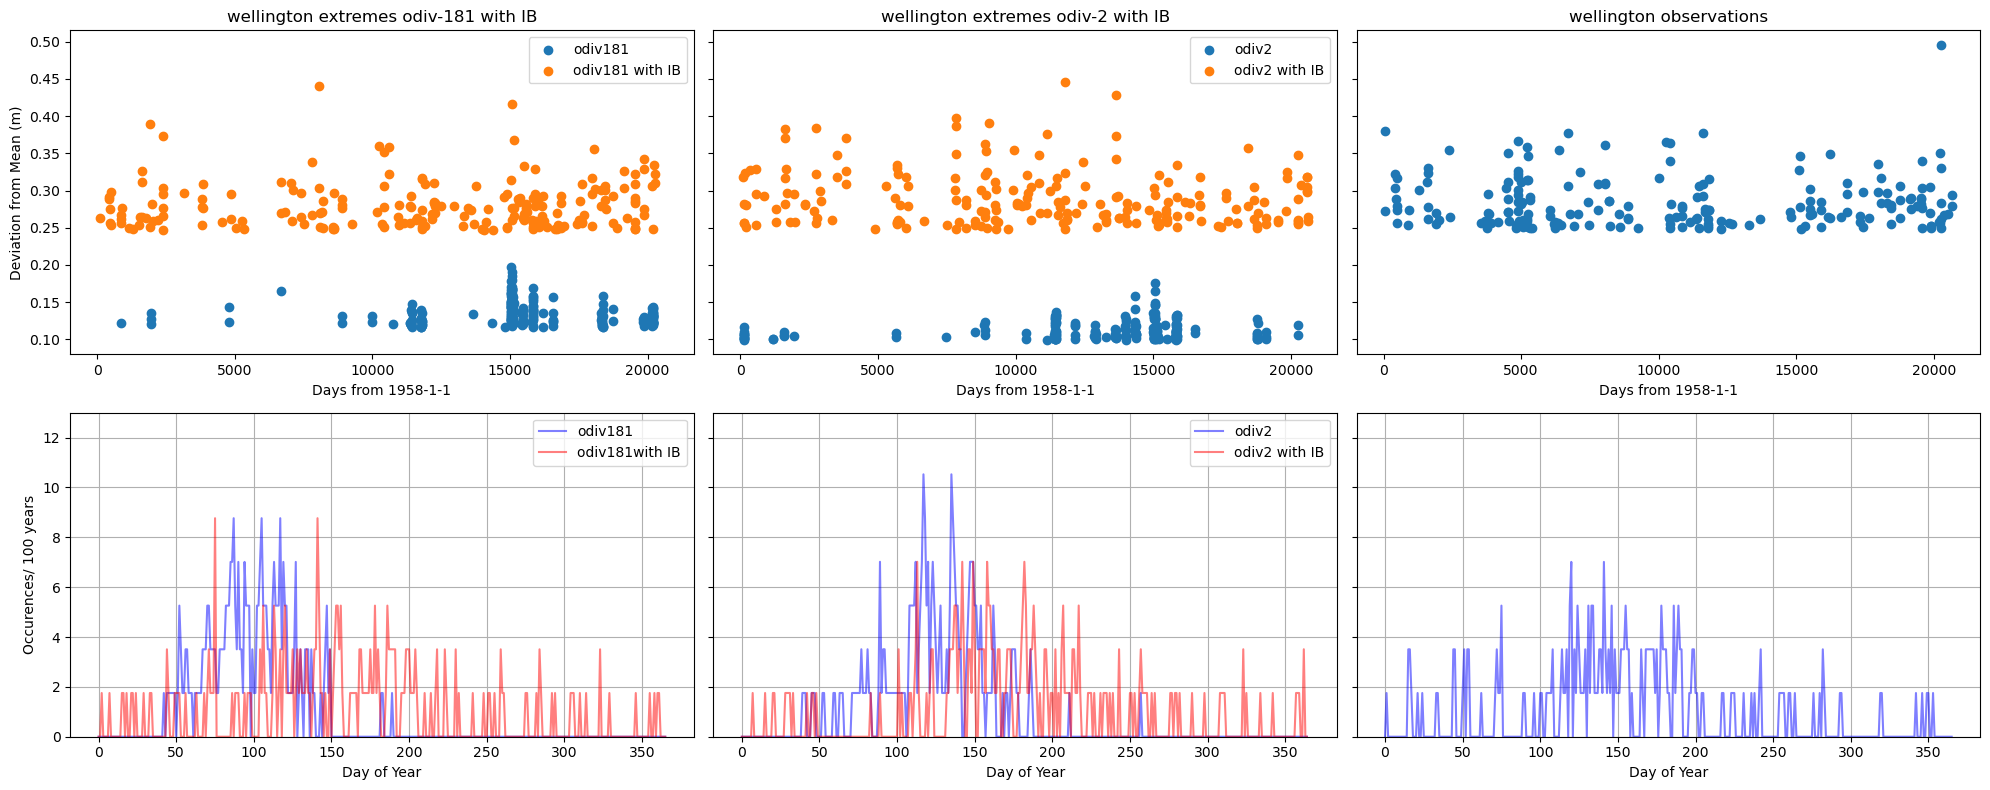

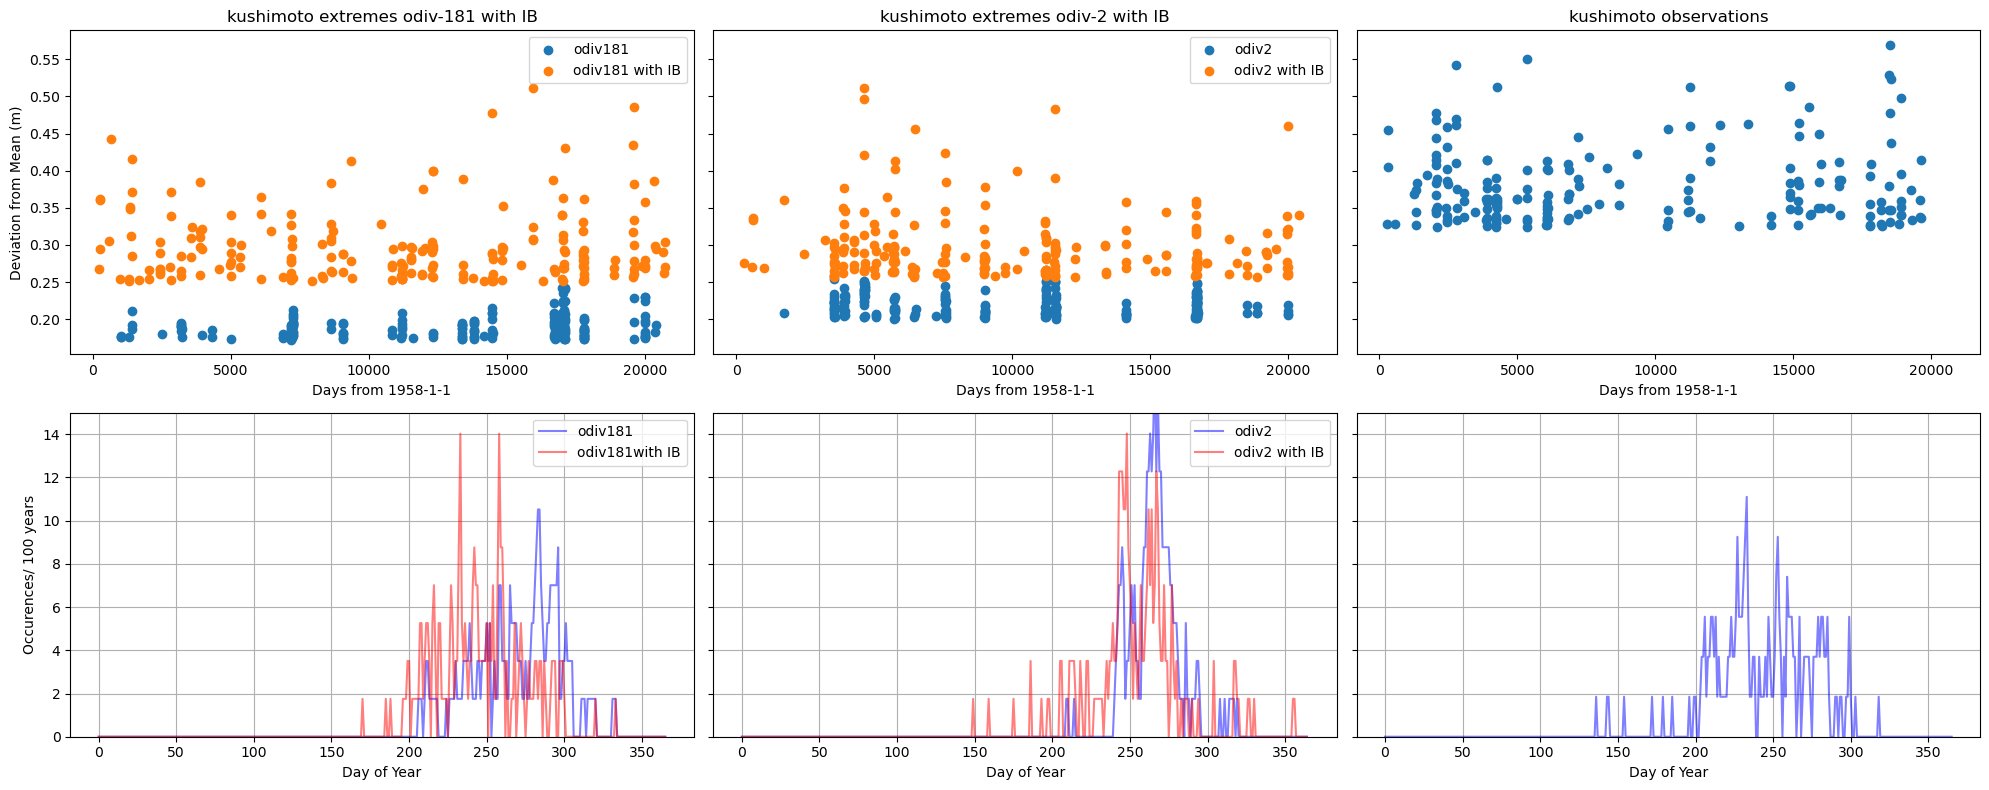

In [9]:
## COPY THIS AND REPLACE WITH CHOSEN LOCATION NAME
#####################
fig, axs = plt.subplots(2, 3, sharey='row', sharex='row', tight_layout=True, figsize=(20,8))

q99 =seattle_181.quantile(0.99)
ds_extreme = seattle_181.where(seattle_181>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][0].scatter(dataframe.index, ds_extreme, label='odiv181')
axs[0][0].set_title("Seattle extremes odiv-181")
axs[0][0].set_ylabel("Deviation from Mean (m)")
axs[0][0].set_xlabel("Days from 1958-1-1")


occurrences=ds_extreme.groupby(seattle_181.time.dt.dayofyear).count()/(len(seattle_181.time)/(100*365))
axs[1][0].plot(occurrences, color="blue", alpha=0.5, label='odiv181')
axs[1][0].set_ylabel("Occurences/ 100 years")
axs[1][0].set_xlabel("Day of Year")
axs[1][0].set_ylim(0,13)
axs[1][0].grid()

q99 =seattle_psl181.quantile(0.99)
ds_extreme = seattle_psl181.where(seattle_psl181>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][0].scatter(dataframe.index, ds_extreme, label='odiv181 with IB')
axs[0][0].set_title("Seattle extremes odiv-181 with IB")
axs[0][0].set_ylabel("Deviation from Mean (m)")
axs[0][0].set_xlabel("Days from 1958-1-1")
axs[0][0].legend()

occurrences=ds_extreme.groupby(seattle_psl181.time.dt.dayofyear).count()/(len(seattle_psl181.time)/(100*365))
axs[1][0].plot(occurrences, color='red', alpha=0.5, label='odiv181with IB')
axs[1][0].set_ylabel("Occurences/ 100 years")
axs[1][0].set_xlabel("Day of Year")
axs[1][0].set_ylim(0,13)
axs[1][0].legend()

q99 =seattle_2.quantile(0.99)
ds_extreme = seattle_2.where(seattle_2>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][1].scatter(dataframe.index, ds_extreme, label='odiv2')
axs[0][1].set_title("Seattle extremes odiv-2")
axs[0][1].set_xlabel("Days from 1958-1-1")

occurrences=ds_extreme.groupby(seattle_2.time.dt.dayofyear).count()/(len(seattle_2.time)/(100*365))
axs[1][1].plot(occurrences, color="blue", alpha=0.5, label='odiv2')
axs[1][1].set_xlabel("Day of Year")
axs[1][1].set_ylim(0,13)
axs[1][1].grid()

q99 =seattle_psl2.quantile(0.99)
ds_extreme = seattle_psl2.where(seattle_psl2>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][1].scatter(dataframe.index, ds_extreme, label='odiv2 with IB')
axs[0][1].set_title("Seattle extremes odiv-2 with IB")
axs[0][1].set_xlabel("Days from 1958-1-1")
axs[0][1].legend()

occurrences=ds_extreme.groupby(seattle_psl2.time.dt.dayofyear).count()/(len(seattle_psl2.time)/(100*365))
axs[1][1].plot(occurrences, color='red', alpha=0.5, label='odiv2 with IB')
axs[1][1].set_xlabel("Day of Year")
axs[1][1].set_ylim(0,13)
axs[1][1].legend()

q99 =seattle_obs.sealevel_tr.quantile(0.99)
ds_extreme = seattle_obs.sealevel_tr.where(seattle_obs.sealevel_tr>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][2].scatter(dataframe.index, ds_extreme)
axs[0][2].set_title("Seattle observations")
axs[0][2].set_xlabel("Days from 1958-1-1")

occurrences=ds_extreme.groupby(seattle_obs.sealevel_tr.datetime.dt.dayofyear).count()/(len(seattle_obs.sealevel_tr.datetime)/(100*365))
axs[1][2].plot(occurrences, color="blue", alpha=0.5)
axs[1][2].set_xlabel("Day of Year")
axs[1][2].set_ylim(0,13)
axs[1][2].grid()

#####################

fig, axs = plt.subplots(2, 3, sharey='row', sharex='row', tight_layout=True, figsize=(20,8))

q99 =sandyhook_181.quantile(0.99)
ds_extreme = sandyhook_181.where(sandyhook_181>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][0].scatter(dataframe.index, ds_extreme, label='odiv181')
axs[0][0].set_title("sandyhook extremes odiv-181")
axs[0][0].set_ylabel("Deviation from Mean (m)")
axs[0][0].set_xlabel("Days from 1958-1-1")


occurrences=ds_extreme.groupby(sandyhook_181.time.dt.dayofyear).count()/(len(sandyhook_181.time)/(100*365))
axs[1][0].plot(occurrences, color="blue", alpha=0.5, label='odiv181')
axs[1][0].set_ylabel("Occurences/ 100 years")
axs[1][0].set_xlabel("Day of Year")
axs[1][0].set_ylim(0,13)
axs[1][0].grid()

q99 =sandyhook_psl181.quantile(0.99)
ds_extreme = sandyhook_psl181.where(sandyhook_psl181>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][0].scatter(dataframe.index, ds_extreme, label='odiv181 with IB')
axs[0][0].set_title("sandyhook extremes odiv-181 with IB")
axs[0][0].set_ylabel("Deviation from Mean (m)")
axs[0][0].set_xlabel("Days from 1958-1-1")
axs[0][0].legend()

occurrences=ds_extreme.groupby(sandyhook_psl181.time.dt.dayofyear).count()/(len(sandyhook_psl181.time)/(100*365))
axs[1][0].plot(occurrences, color='red', alpha=0.5, label='odiv181with IB')
axs[1][0].set_ylabel("Occurences/ 100 years")
axs[1][0].set_xlabel("Day of Year")
axs[1][0].set_ylim(0,13)
axs[1][0].legend()

q99 =sandyhook_2.quantile(0.99)
ds_extreme = sandyhook_2.where(sandyhook_2>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][1].scatter(dataframe.index, ds_extreme, label='odiv2')
axs[0][1].set_title("sandyhook extremes odiv-2")
axs[0][1].set_xlabel("Days from 1958-1-1")

occurrences=ds_extreme.groupby(sandyhook_2.time.dt.dayofyear).count()/(len(sandyhook_2.time)/(100*365))
axs[1][1].plot(occurrences, color="blue", alpha=0.5, label='odiv2')
axs[1][1].set_xlabel("Day of Year")
axs[1][1].set_ylim(0,13)
axs[1][1].grid()

q99 =sandyhook_psl2.quantile(0.99)
ds_extreme = sandyhook_psl2.where(sandyhook_psl2>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][1].scatter(dataframe.index, ds_extreme, label='odiv2 with IB')
axs[0][1].set_title("sandyhook extremes odiv-2 with IB")
axs[0][1].set_xlabel("Days from 1958-1-1")
axs[0][1].legend()

occurrences=ds_extreme.groupby(sandyhook_psl2.time.dt.dayofyear).count()/(len(sandyhook_psl2.time)/(100*365))
axs[1][1].plot(occurrences, color='red', alpha=0.5, label='odiv2 with IB')
axs[1][1].set_xlabel("Day of Year")
axs[1][1].set_ylim(0,13)
axs[1][1].legend()

q99 =sandyhook_obs.sealevel_tr.quantile(0.99)
ds_extreme = sandyhook_obs.sealevel_tr.where(sandyhook_obs.sealevel_tr>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][2].scatter(dataframe.index, ds_extreme)
axs[0][2].set_title("sandyhook observations")
axs[0][2].set_xlabel("Days from 1958-1-1")

occurrences=ds_extreme.groupby(sandyhook_obs.sealevel_tr.datetime.dt.dayofyear).count()/(len(sandyhook_obs.sealevel_tr.datetime)/(100*365))
axs[1][2].plot(occurrences, color="blue", alpha=0.5)
axs[1][2].set_xlabel("Day of Year")
axs[1][2].set_ylim(0,13)
axs[1][2].grid()
#############################

fig, axs = plt.subplots(2, 3, sharey='row', sharex='row', tight_layout=True, figsize=(20,8))

q99 =wellington_181.quantile(0.99)
ds_extreme = wellington_181.where(wellington_181>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][0].scatter(dataframe.index, ds_extreme, label='odiv181')
axs[0][0].set_title("wellington extremes odiv-181")
axs[0][0].set_ylabel("Deviation from Mean (m)")
axs[0][0].set_xlabel("Days from 1958-1-1")


occurrences=ds_extreme.groupby(wellington_181.time.dt.dayofyear).count()/(len(wellington_181.time)/(100*365))
axs[1][0].plot(occurrences, color="blue", alpha=0.5, label='odiv181')
axs[1][0].set_ylabel("Occurences/ 100 years")
axs[1][0].set_xlabel("Day of Year")
axs[1][0].set_ylim(0,13)
axs[1][0].grid()

q99 =wellington_psl181.quantile(0.99)
ds_extreme = wellington_psl181.where(wellington_psl181>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][0].scatter(dataframe.index, ds_extreme, label='odiv181 with IB')
axs[0][0].set_title("wellington extremes odiv-181 with IB")
axs[0][0].set_ylabel("Deviation from Mean (m)")
axs[0][0].set_xlabel("Days from 1958-1-1")
axs[0][0].legend()

occurrences=ds_extreme.groupby(wellington_psl181.time.dt.dayofyear).count()/(len(wellington_psl181.time)/(100*365))
axs[1][0].plot(occurrences, color='red', alpha=0.5, label='odiv181with IB')
axs[1][0].set_ylabel("Occurences/ 100 years")
axs[1][0].set_xlabel("Day of Year")
axs[1][0].set_ylim(0,13)
axs[1][0].legend()

q99 =wellington_2.quantile(0.99)
ds_extreme = wellington_2.where(wellington_2>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][1].scatter(dataframe.index, ds_extreme, label='odiv2')
axs[0][1].set_title("wellington extremes odiv-2")
axs[0][1].set_xlabel("Days from 1958-1-1")

occurrences=ds_extreme.groupby(wellington_2.time.dt.dayofyear).count()/(len(wellington_2.time)/(100*365))
axs[1][1].plot(occurrences, color="blue", alpha=0.5, label='odiv2')
axs[1][1].set_xlabel("Day of Year")
axs[1][1].set_ylim(0,13)
axs[1][1].grid()

q99 =wellington_psl2.quantile(0.99)
ds_extreme = wellington_psl2.where(wellington_psl2>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][1].scatter(dataframe.index, ds_extreme, label='odiv2 with IB')
axs[0][1].set_title("wellington extremes odiv-2 with IB")
axs[0][1].set_xlabel("Days from 1958-1-1")
axs[0][1].legend()

occurrences=ds_extreme.groupby(wellington_psl2.time.dt.dayofyear).count()/(len(wellington_psl2.time)/(100*365))
axs[1][1].plot(occurrences, color='red', alpha=0.5, label='odiv2 with IB')
axs[1][1].set_xlabel("Day of Year")
axs[1][1].set_ylim(0,13)
axs[1][1].legend()

q99 =wellington_obs.sealevel_tr.quantile(0.99)
ds_extreme = wellington_obs.sealevel_tr.where(wellington_obs.sealevel_tr>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][2].scatter(dataframe.index, ds_extreme)
axs[0][2].set_title("wellington observations")
axs[0][2].set_xlabel("Days from 1958-1-1")

occurrences=ds_extreme.groupby(wellington_obs.sealevel_tr.datetime.dt.dayofyear).count()/(len(wellington_obs.sealevel_tr.datetime)/(100*365))
axs[1][2].plot(occurrences, color="blue", alpha=0.5)
axs[1][2].set_xlabel("Day of Year")
axs[1][2].set_ylim(0,13)
axs[1][2].grid()
#####################################################################
fig, axs = plt.subplots(2, 3, sharey='row', sharex='row', tight_layout=True, figsize=(20,8))

q99 =kushimoto_181.quantile(0.99)
ds_extreme = kushimoto_181.where(kushimoto_181>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][0].scatter(dataframe.index, ds_extreme, label='odiv181')
axs[0][0].set_title("kushimoto extremes odiv-181")
axs[0][0].set_ylabel("Deviation from Mean (m)")
axs[0][0].set_xlabel("Days from 1958-1-1")


occurrences=ds_extreme.groupby(kushimoto_181.time.dt.dayofyear).count()/(len(kushimoto_181.time)/(100*365))
axs[1][0].plot(occurrences, color="blue", alpha=0.5, label='odiv181')
axs[1][0].set_ylabel("Occurences/ 100 years")
axs[1][0].set_xlabel("Day of Year")
axs[1][0].set_ylim(0,15)
axs[1][0].grid()

q99 =kushimoto_psl181.quantile(0.99)
ds_extreme = kushimoto_psl181.where(kushimoto_psl181>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][0].scatter(dataframe.index, ds_extreme, label='odiv181 with IB')
axs[0][0].set_title("kushimoto extremes odiv-181 with IB")
axs[0][0].set_ylabel("Deviation from Mean (m)")
axs[0][0].set_xlabel("Days from 1958-1-1")
axs[0][0].legend()

occurrences=ds_extreme.groupby(kushimoto_psl181.time.dt.dayofyear).count()/(len(kushimoto_psl181.time)/(100*365))
axs[1][0].plot(occurrences, color='red', alpha=0.5, label='odiv181with IB')
axs[1][0].set_ylabel("Occurences/ 100 years")
axs[1][0].set_xlabel("Day of Year")
axs[1][0].set_ylim(0,15)
axs[1][0].legend()

q99 =kushimoto_2.quantile(0.99)
ds_extreme = kushimoto_2.where(kushimoto_2>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][1].scatter(dataframe.index, ds_extreme, label='odiv2')
axs[0][1].set_title("kushimoto extremes odiv-2")
axs[0][1].set_xlabel("Days from 1958-1-1")

occurrences=ds_extreme.groupby(kushimoto_2.time.dt.dayofyear).count()/(len(kushimoto_2.time)/(100*365))
axs[1][1].plot(occurrences, color="blue", alpha=0.5, label='odiv2')
axs[1][1].set_xlabel("Day of Year")
axs[1][1].set_ylim(0,15)
axs[1][1].grid()

q99 =kushimoto_psl2.quantile(0.99)
ds_extreme = kushimoto_psl2.where(kushimoto_psl2>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][1].scatter(dataframe.index, ds_extreme, label='odiv2 with IB')
axs[0][1].set_title("kushimoto extremes odiv-2 with IB")
axs[0][1].set_xlabel("Days from 1958-1-1")
axs[0][1].legend()

occurrences=ds_extreme.groupby(kushimoto_psl2.time.dt.dayofyear).count()/(len(kushimoto_psl2.time)/(100*365))
axs[1][1].plot(occurrences, color='red', alpha=0.5, label='odiv2 with IB')
axs[1][1].set_xlabel("Day of Year")
axs[1][1].set_ylim(0,15)
axs[1][1].legend()

q99 =kushimoto_obs.sealevel_tr.quantile(0.99)
ds_extreme = kushimoto_obs.sealevel_tr.where(kushimoto_obs.sealevel_tr>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][2].scatter(dataframe.index, ds_extreme)
axs[0][2].set_title("kushimoto observations")
axs[0][2].set_xlabel("Days from 1958-1-1")

occurrences=ds_extreme.groupby(kushimoto_obs.sealevel_tr.datetime.dt.dayofyear).count()/(len(kushimoto_obs.sealevel_tr.datetime)/(100*365))
axs[1][2].plot(occurrences, color="blue", alpha=0.5)
axs[1][2].set_xlabel("Day of Year")
axs[1][2].set_ylim(0,15)
axs[1][2].grid()

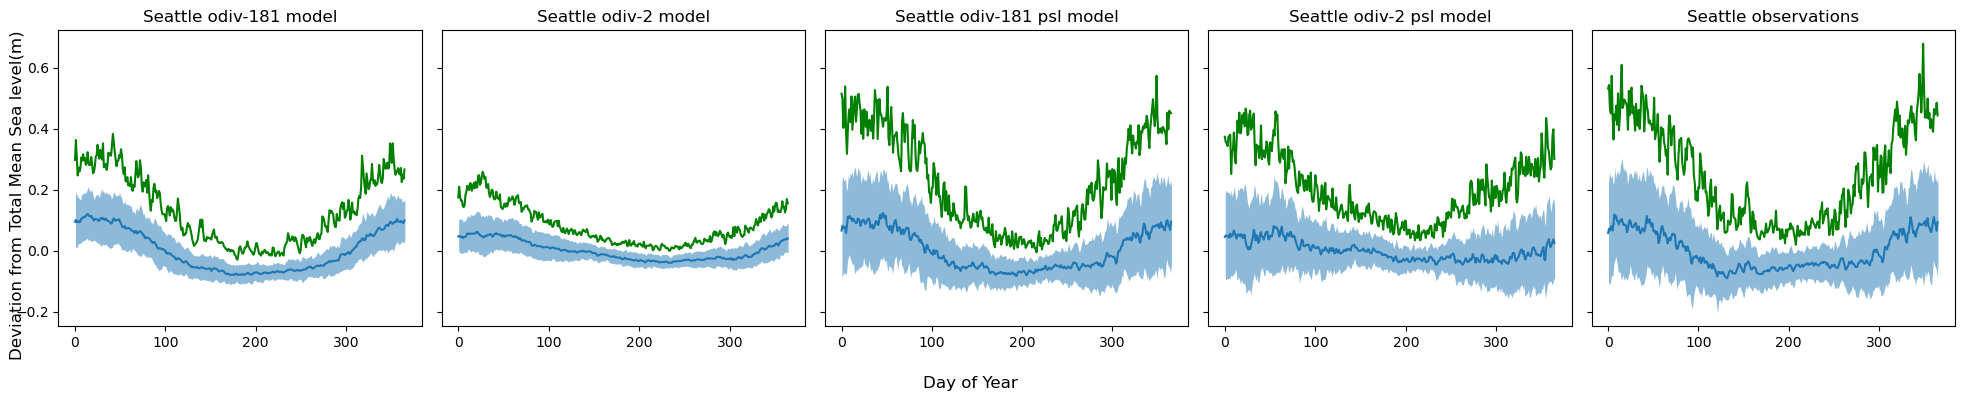

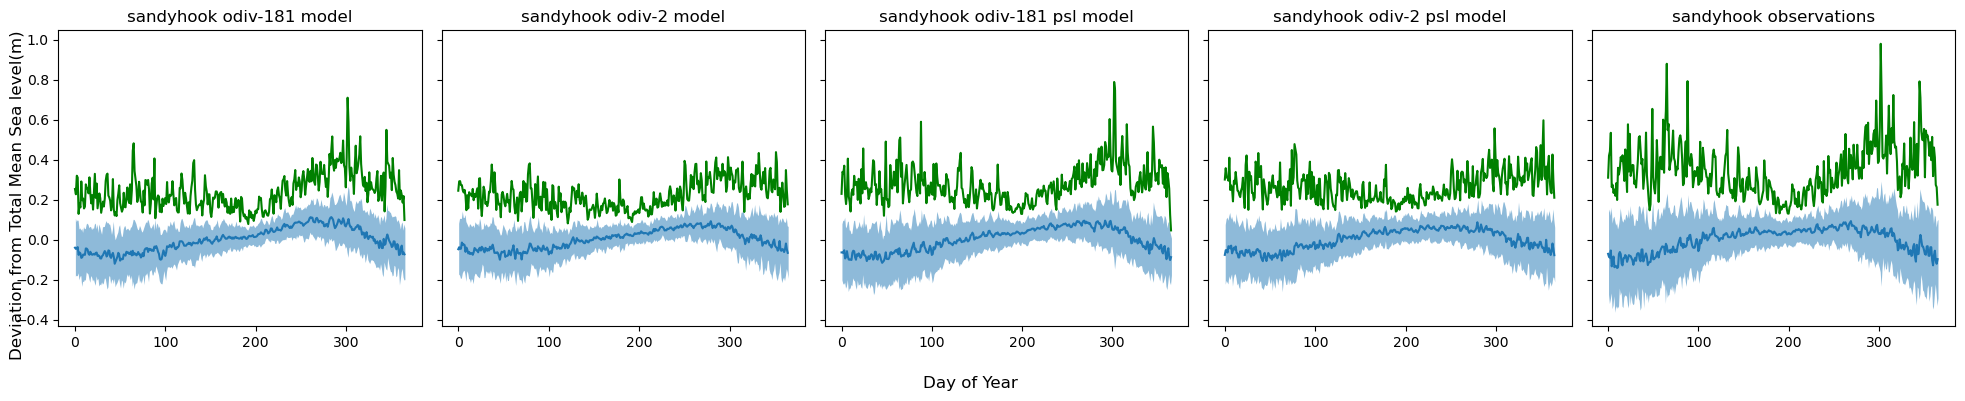

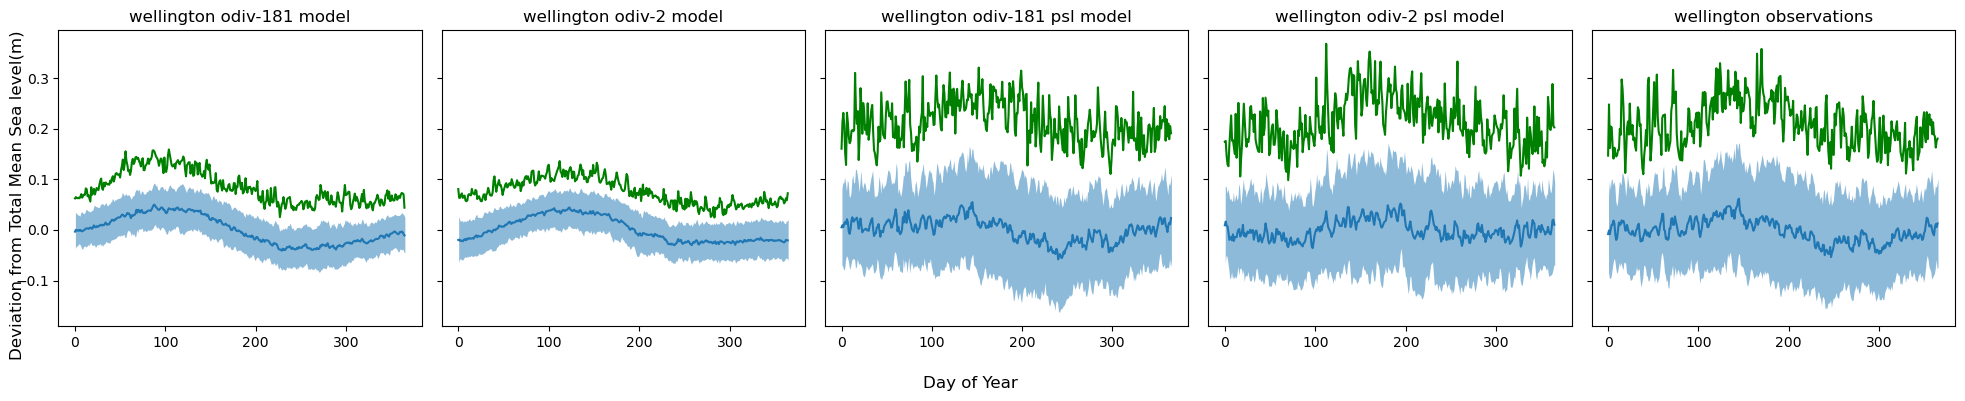

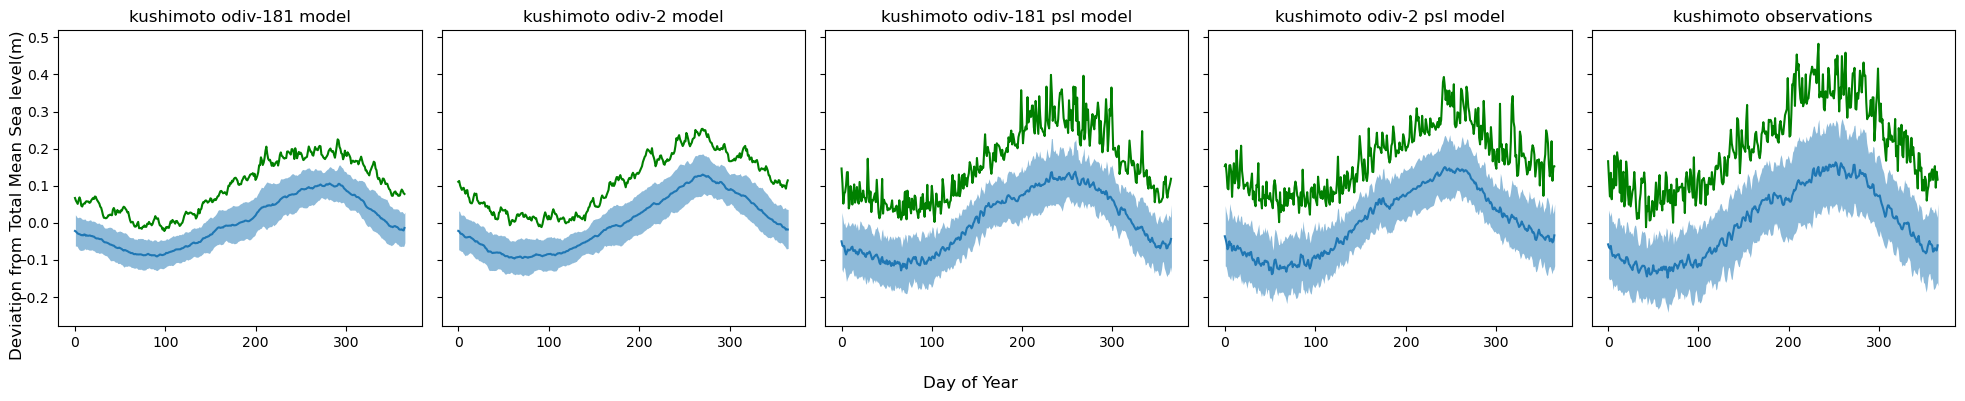

In [16]:
## COPY THIS AND REPLACE WITH CHOSEN LOCATION NAME
#########################################################
fig, axs = plt.subplots(1, 5, sharex=False, sharey=True, tight_layout=True, figsize=(20,4))

seasonal_stdev = seattle_181.groupby(seattle_181.time.dt.dayofyear).std()
seasonal_mean = seattle_181.groupby(seattle_181.time.dt.dayofyear).mean()
seasonal_q99 = seattle_181.groupby(seattle_181.time.dt.dayofyear).quantile(0.99)
axs[0].plot(seasonal_mean, label='daily mean')
axs[0].plot(seasonal_q99, color='green', label='99th quantile')
axs[0].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[0].set_title("Seattle odiv-181 model")

seasonal_stdev = seattle_2.groupby(seattle_2.time.dt.dayofyear).std()
seasonal_mean = seattle_2.groupby(seattle_2.time.dt.dayofyear).mean()
seasonal_q99 = seattle_2.groupby(seattle_2.time.dt.dayofyear).quantile(0.99)
axs[1].plot(seasonal_mean, label='daily mean')
axs[1].plot(seasonal_q99, color='green', label='99th quantile')
axs[1].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[1].set_title("Seattle odiv-2 model")

seasonal_stdev = seattle_psl181.groupby(seattle_psl181.time.dt.dayofyear).std()
seasonal_mean = seattle_psl181.groupby(seattle_psl181.time.dt.dayofyear).mean()
seasonal_q99 = seattle_psl181.groupby(seattle_psl181.time.dt.dayofyear).quantile(0.99)
axs[2].plot(seasonal_mean, label='daily mean')
axs[2].plot(seasonal_q99, color='green', label='99th quantile')
axs[2].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[2].set_title("Seattle odiv-181 psl model")

seasonal_stdev = seattle_psl2.groupby(seattle_psl2.time.dt.dayofyear).std()
seasonal_mean = seattle_psl2.groupby(seattle_psl2.time.dt.dayofyear).mean()
seasonal_q99 = seattle_psl2.groupby(seattle_psl2.time.dt.dayofyear).quantile(0.99)
axs[3].plot(seasonal_mean, label='daily mean')
axs[3].plot(seasonal_q99, color='green', label='99th quantile')
axs[3].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[3].set_title("Seattle odiv-2 psl model")

seasonal_stdev = seattle_obs.sealevel_tr.groupby(seattle_obs.sealevel_tr.datetime.dt.dayofyear).std()
seasonal_mean = seattle_obs.sealevel_tr.groupby(seattle_obs.sealevel_tr.datetime.dt.dayofyear).mean()
seasonal_q99 = seattle_obs.sealevel_tr.groupby(seattle_obs.sealevel_tr.datetime.dt.dayofyear).quantile(0.99)
axs[4].plot(seasonal_mean, label='daily mean')
axs[4].plot(seasonal_q99, color='green', label='99th quantile')
axs[4].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[4].set_title("Seattle observations")

fig.supxlabel("Day of Year")
fig.supylabel("Deviation from Total Mean Sea level(m)")
plt.show()

##################################################################

fig, axs = plt.subplots(1, 5, sharex=False, sharey=True, tight_layout=True, figsize=(20,4))

seasonal_stdev = sandyhook_181.groupby(sandyhook_181.time.dt.dayofyear).std()
seasonal_mean = sandyhook_181.groupby(sandyhook_181.time.dt.dayofyear).mean()
seasonal_q99 = sandyhook_181.groupby(sandyhook_181.time.dt.dayofyear).quantile(0.99)
axs[0].plot(seasonal_mean, label='daily mean')
axs[0].plot(seasonal_q99, color='green', label='99th quantile')
axs[0].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[0].set_title("sandyhook odiv-181 model")

seasonal_stdev = sandyhook_2.groupby(sandyhook_2.time.dt.dayofyear).std()
seasonal_mean = sandyhook_2.groupby(sandyhook_2.time.dt.dayofyear).mean()
seasonal_q99 = sandyhook_2.groupby(sandyhook_2.time.dt.dayofyear).quantile(0.99)
axs[1].plot(seasonal_mean, label='daily mean')
axs[1].plot(seasonal_q99, color='green', label='99th quantile')
axs[1].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[1].set_title("sandyhook odiv-2 model")

seasonal_stdev = sandyhook_psl181.groupby(sandyhook_psl181.time.dt.dayofyear).std()
seasonal_mean = sandyhook_psl181.groupby(sandyhook_psl181.time.dt.dayofyear).mean()
seasonal_q99 = sandyhook_psl181.groupby(sandyhook_psl181.time.dt.dayofyear).quantile(0.99)
axs[2].plot(seasonal_mean, label='daily mean')
axs[2].plot(seasonal_q99, color='green', label='99th quantile')
axs[2].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[2].set_title("sandyhook odiv-181 psl model")

seasonal_stdev = sandyhook_psl2.groupby(sandyhook_psl2.time.dt.dayofyear).std()
seasonal_mean = sandyhook_psl2.groupby(sandyhook_psl2.time.dt.dayofyear).mean()
seasonal_q99 = sandyhook_psl2.groupby(sandyhook_psl2.time.dt.dayofyear).quantile(0.99)
axs[3].plot(seasonal_mean, label='daily mean')
axs[3].plot(seasonal_q99, color='green', label='99th quantile')
axs[3].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[3].set_title("sandyhook odiv-2 psl model")

seasonal_stdev = sandyhook_obs.sealevel_tr.groupby(sandyhook_obs.sealevel_tr.datetime.dt.dayofyear).std()
seasonal_mean = sandyhook_obs.sealevel_tr.groupby(sandyhook_obs.sealevel_tr.datetime.dt.dayofyear).mean()
seasonal_q99 = sandyhook_obs.sealevel_tr.groupby(sandyhook_obs.sealevel_tr.datetime.dt.dayofyear).quantile(0.99)
axs[4].plot(seasonal_mean, label='daily mean')
axs[4].plot(seasonal_q99, color='green', label='99th quantile')
axs[4].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[4].set_title("sandyhook observations")

fig.supxlabel("Day of Year")
fig.supylabel("Deviation from Total Mean Sea level(m)")
plt.show()

fig, axs = plt.subplots(1, 5, sharex=False, sharey=True, tight_layout=True, figsize=(20,4))

seasonal_stdev = wellington_181.groupby(wellington_181.time.dt.dayofyear).std()
seasonal_mean = wellington_181.groupby(wellington_181.time.dt.dayofyear).mean()
seasonal_q99 = wellington_181.groupby(wellington_181.time.dt.dayofyear).quantile(0.99)
axs[0].plot(seasonal_mean, label='daily mean')
axs[0].plot(seasonal_q99, color='green', label='99th quantile')
axs[0].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[0].set_title("wellington odiv-181 model")

seasonal_stdev = wellington_2.groupby(wellington_2.time.dt.dayofyear).std()
seasonal_mean = wellington_2.groupby(wellington_2.time.dt.dayofyear).mean()
seasonal_q99 = wellington_2.groupby(wellington_2.time.dt.dayofyear).quantile(0.99)
axs[1].plot(seasonal_mean, label='daily mean')
axs[1].plot(seasonal_q99, color='green', label='99th quantile')
axs[1].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[1].set_title("wellington odiv-2 model")

seasonal_stdev = wellington_psl181.groupby(wellington_psl181.time.dt.dayofyear).std()
seasonal_mean = wellington_psl181.groupby(wellington_psl181.time.dt.dayofyear).mean()
seasonal_q99 = wellington_psl181.groupby(wellington_psl181.time.dt.dayofyear).quantile(0.99)
axs[2].plot(seasonal_mean, label='daily mean')
axs[2].plot(seasonal_q99, color='green', label='99th quantile')
axs[2].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[2].set_title("wellington odiv-181 psl model")

seasonal_stdev = wellington_psl2.groupby(wellington_psl2.time.dt.dayofyear).std()
seasonal_mean = wellington_psl2.groupby(wellington_psl2.time.dt.dayofyear).mean()
seasonal_q99 = wellington_psl2.groupby(wellington_psl2.time.dt.dayofyear).quantile(0.99)
axs[3].plot(seasonal_mean, label='daily mean')
axs[3].plot(seasonal_q99, color='green', label='99th quantile')
axs[3].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[3].set_title("wellington odiv-2 psl model")

seasonal_stdev = wellington_obs.sealevel_tr.groupby(wellington_obs.sealevel_tr.datetime.dt.dayofyear).std()
seasonal_mean = wellington_obs.sealevel_tr.groupby(wellington_obs.sealevel_tr.datetime.dt.dayofyear).mean()
seasonal_q99 = wellington_obs.sealevel_tr.groupby(wellington_obs.sealevel_tr.datetime.dt.dayofyear).quantile(0.99)
axs[4].plot(seasonal_mean, label='daily mean')
axs[4].plot(seasonal_q99, color='green', label='99th quantile')
axs[4].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[4].set_title("wellington observations")

fig.supxlabel("Day of Year")
fig.supylabel("Deviation from Total Mean Sea level(m)")
plt.show()
#########################################################################################################
fig, axs = plt.subplots(1, 5, sharex=False, sharey=True, tight_layout=True, figsize=(20,4))

seasonal_stdev = kushimoto_181.groupby(kushimoto_181.time.dt.dayofyear).std()
seasonal_mean = kushimoto_181.groupby(kushimoto_181.time.dt.dayofyear).mean()
seasonal_q99 = kushimoto_181.groupby(kushimoto_181.time.dt.dayofyear).quantile(0.99)
axs[0].plot(seasonal_mean, label='daily mean')
axs[0].plot(seasonal_q99, color='green', label='99th quantile')
axs[0].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[0].set_title("kushimoto odiv-181 model")

seasonal_stdev = kushimoto_2.groupby(kushimoto_2.time.dt.dayofyear).std()
seasonal_mean = kushimoto_2.groupby(kushimoto_2.time.dt.dayofyear).mean()
seasonal_q99 = kushimoto_2.groupby(kushimoto_2.time.dt.dayofyear).quantile(0.99)
axs[1].plot(seasonal_mean, label='daily mean')
axs[1].plot(seasonal_q99, color='green', label='99th quantile')
axs[1].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[1].set_title("kushimoto odiv-2 model")

seasonal_stdev = kushimoto_psl181.groupby(kushimoto_psl181.time.dt.dayofyear).std()
seasonal_mean = kushimoto_psl181.groupby(kushimoto_psl181.time.dt.dayofyear).mean()
seasonal_q99 = kushimoto_psl181.groupby(kushimoto_psl181.time.dt.dayofyear).quantile(0.99)
axs[2].plot(seasonal_mean, label='daily mean')
axs[2].plot(seasonal_q99, color='green', label='99th quantile')
axs[2].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[2].set_title("kushimoto odiv-181 psl model")

seasonal_stdev = kushimoto_psl2.groupby(kushimoto_psl2.time.dt.dayofyear).std()
seasonal_mean = kushimoto_psl2.groupby(kushimoto_psl2.time.dt.dayofyear).mean()
seasonal_q99 = kushimoto_psl2.groupby(kushimoto_psl2.time.dt.dayofyear).quantile(0.99)
axs[3].plot(seasonal_mean, label='daily mean')
axs[3].plot(seasonal_q99, color='green', label='99th quantile')
axs[3].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[3].set_title("kushimoto odiv-2 psl model")

seasonal_stdev = kushimoto_obs.sealevel_tr.groupby(kushimoto_obs.sealevel_tr.datetime.dt.dayofyear).std()
seasonal_mean = kushimoto_obs.sealevel_tr.groupby(kushimoto_obs.sealevel_tr.datetime.dt.dayofyear).mean()
seasonal_q99 = kushimoto_obs.sealevel_tr.groupby(kushimoto_obs.sealevel_tr.datetime.dt.dayofyear).quantile(0.99)
axs[4].plot(seasonal_mean, label='daily mean')
axs[4].plot(seasonal_q99, color='green', label='99th quantile')
axs[4].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[4].set_title("kushimoto observations")

fig.supxlabel("Day of Year")
fig.supylabel("Deviation from Total Mean Sea level(m)")
plt.show()

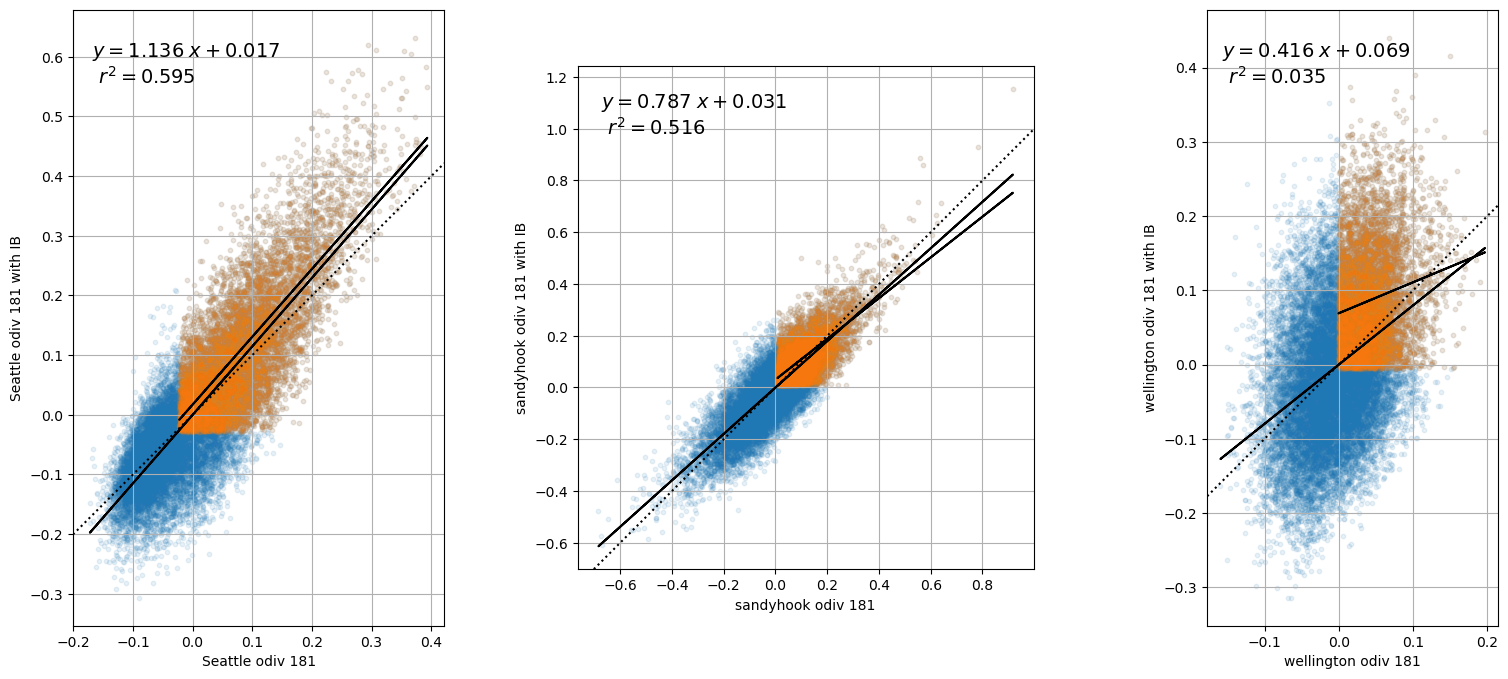

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(20,8))

axs[0].scatter(seattle_181, seattle_psl181, alpha=0.1, s=10)
x = np.polyfit(seattle_181, seattle_psl181, 1)
y = np.poly1d(x)
r2 = round(r2_score(seattle_psl181, y(seattle_181)),3)
axs[0].plot(seattle_181, y(seattle_181), color='black')
axs[0].set_xlabel("Seattle odiv 181")
axs[0].set_ylabel("Seattle odiv 181 with IB")
axs[0].set_aspect(aspect='equal')
axs[0].grid()
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(0.1)) 
axs[0].yaxis.set_major_locator(ticker.MultipleLocator(0.1)) 


extreme_181= seattle_181.where((seattle_181>=seattle_181.quantile(0.50)) & (seattle_psl181>=seattle_psl181.quantile(0.50)))
extreme_psl181=seattle_psl181.where((seattle_181>=seattle_181.quantile(0.50)) & (seattle_psl181>=seattle_psl181.quantile(0.50)))
extreme_nan= np.array(extreme_181)
extreme_181_nan=extreme_181[np.logical_not(np.isnan(extreme_nan))]
extreme_psl181_nan=extreme_psl181[np.logical_not(np.isnan(extreme_nan))]
axs[0].scatter(extreme_181_nan, extreme_psl181_nan, alpha=0.1, s=10)


x = np.polyfit(extreme_181_nan, extreme_psl181_nan, 1)
y = np.poly1d(x)
r2 = round(r2_score(extreme_psl181_nan, y(extreme_181_nan)),3)
axs[0].plot(extreme_181_nan, y(extreme_181_nan), color='black')
text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n $r^2= {r2}$"
axs[0].text(0.05, 0.95, text,transform=axs[0].transAxes,
     fontsize=14, verticalalignment='top')


axs[1].scatter(sandyhook_181, sandyhook_psl181, alpha=0.1, s=10)
x = np.polyfit(sandyhook_181, sandyhook_psl181, 1)
y = np.poly1d(x)
r2 = round(r2_score(sandyhook_psl181, y(sandyhook_181)),3)
axs[1].plot(sandyhook_181, y(sandyhook_181), color='black')
#text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n $r^2= {r2}$"
#axs[1].text(0.05, 0.95, text,transform=axs[1].transAxes,
#     fontsize=14, verticalalignment='top')
axs[1].set_xlabel("sandyhook odiv 181")
axs[1].set_ylabel("sandyhook odiv 181 with IB")
axs[1].set_aspect(aspect='equal')
axs[1].grid()
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(0.2)) 
axs[1].yaxis.set_major_locator(ticker.MultipleLocator(0.2)) 

extreme_181= sandyhook_181.where((sandyhook_181>=sandyhook_181.quantile(0.50))&(sandyhook_psl181>=sandyhook_psl181.quantile(0.50)))
extreme_psl181=sandyhook_psl181.where((sandyhook_181>=sandyhook_181.quantile(0.50))&(sandyhook_psl181>=sandyhook_psl181.quantile(0.50)))
extreme_nan= np.array(extreme_181)
extreme_181_nan=extreme_181[np.logical_not(np.isnan(extreme_nan))]
extreme_psl181_nan=extreme_psl181[np.logical_not(np.isnan(extreme_nan))]
axs[1].scatter(extreme_181_nan, extreme_psl181_nan, alpha=0.1, s=10)

x = np.polyfit(extreme_181_nan, extreme_psl181_nan, 1)
y = np.poly1d(x)
r2 = round(r2_score(extreme_psl181_nan, y(extreme_181_nan)),3)
axs[1].plot(extreme_181_nan, y(extreme_181_nan), color='black')
text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n $r^2= {r2}$"
axs[1].text(0.05, 0.95, text,transform=axs[1].transAxes,
     fontsize=14, verticalalignment='top')


axs[2].scatter(wellington_181, wellington_psl181, alpha=0.1, s=10)
x = np.polyfit(wellington_181, wellington_psl181, 1)
y = np.poly1d(x)
r2 = round(r2_score(wellington_psl181, y(wellington_181)),3)
axs[2].plot(wellington_181, y(wellington_181), color='black', label='Trendline')
#text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n $r^2= {r2}$"
#axs[2].text(0.05, 0.95, text,transform=axs[2].transAxes,
#     fontsize=14, verticalalignment='top')
axs[2].set_xlabel("wellington odiv 181")
axs[2].set_ylabel("wellington odiv 181 with IB")
axs[2].set_aspect(aspect='equal')
axs[2].grid()
axs[2].xaxis.set_major_locator(ticker.MultipleLocator(0.1)) 
axs[2].yaxis.set_major_locator(ticker.MultipleLocator(0.1)) 

extreme_181= wellington_181.where((wellington_181>=wellington_181.quantile(0.50))&(wellington_psl181>=wellington_psl181.quantile(0.50)))
extreme_psl181=wellington_psl181.where((wellington_181>=wellington_181.quantile(0.50))&(wellington_psl181>=wellington_psl181.quantile(0.50)))
extreme_nan= np.array(extreme_181)
extreme_181_nan=extreme_181[np.logical_not(np.isnan(extreme_nan))]
extreme_psl181_nan=extreme_psl181[np.logical_not(np.isnan(extreme_nan))]
axs[2].scatter(extreme_181_nan, extreme_psl181_nan, alpha=0.1, s=10)

x = np.polyfit(extreme_181_nan, extreme_psl181_nan, 1)
y = np.poly1d(x)
r2 = round(r2_score(extreme_psl181_nan, y(extreme_181_nan)),3)
axs[2].plot(extreme_181_nan, y(extreme_181_nan), color='black')
text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n $r^2= {r2}$"
axs[2].text(0.05, 0.95, text,transform=axs[2].transAxes,
     fontsize=14, verticalalignment='top')

#x = np.polyfit(extreme_181_nan, extreme_psl181_nan, 1)
#y = np.poly1d(x)
#r2 = round(r2_score(extreme_psl181_nan, y(extreme_181_nan)),3)
#axs[2].plot(extreme_181_nan, y(extreme_181_nan), color='black')
#text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n $r^2= {r2}$"
#axs[2].text(0.05, 0.95, text,transform=axs[2].transAxes,
 #    fontsize=14, verticalalignment='top')

axs[0].axline((0, 0), slope=1, color='black', linestyle='dotted')
axs[1].axline((0, 0), slope=1, color='black', linestyle='dotted')
axs[2].axline((0, 0), slope=1, color='black', linestyle='dotted', label='Trendline with no IB effect')

/vftmp/Olivia.Mcredmond/pid181314/ipykernel_183366/3194258546.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, _, _, _ = np.linalg.lstsq(extreme_181_nan, extreme_psl181_nan)
/vftmp/Olivia.Mcredmond/pid181314/ipykernel_183366/3194258546.py:52: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, _, _, _ = np.linalg.lstsq(extreme_181_nan, extreme_psl181_nan)
/vftmp/Olivia.Mcredmond/pid181314/ipykernel_183366/3194258546.py:79: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(

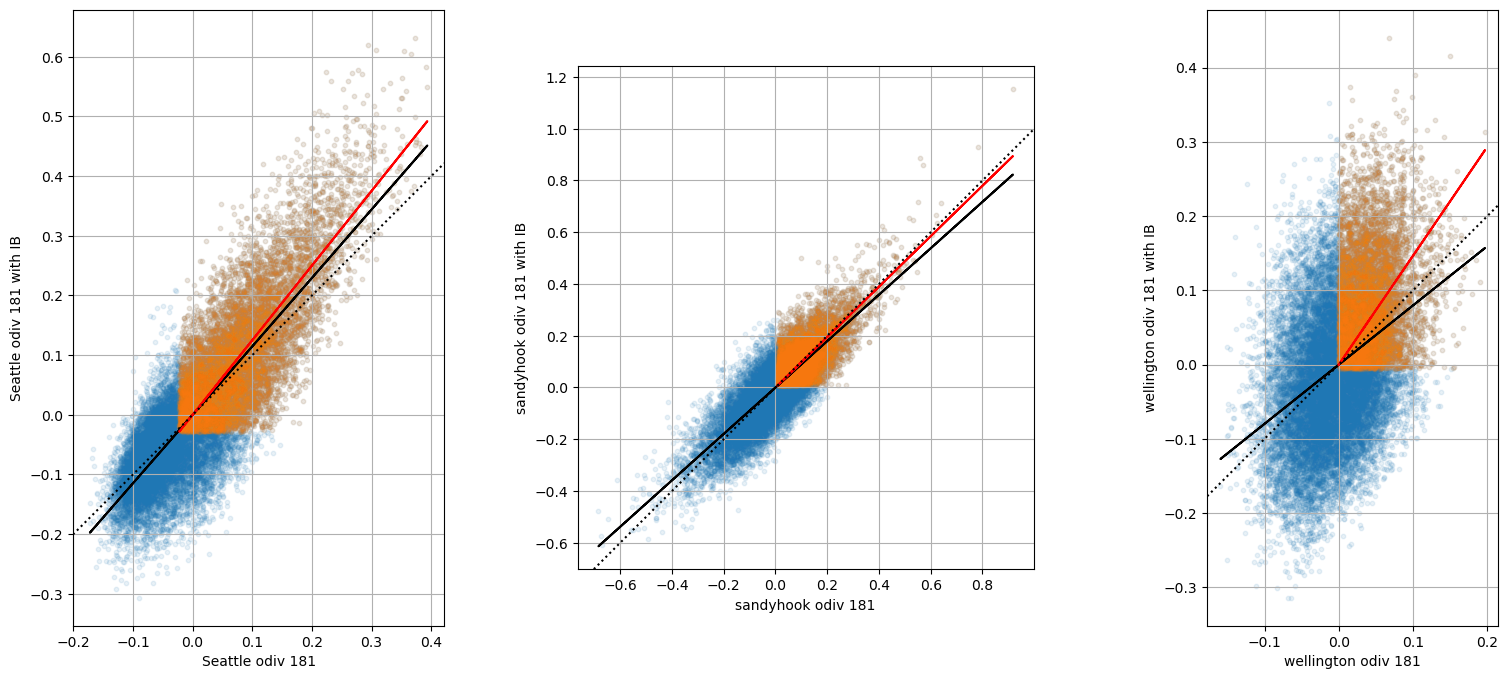

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(20,8))

axs[0].scatter(seattle_181, seattle_psl181, alpha=0.1, s=10)
x = np.polyfit(seattle_181, seattle_psl181, 1)
y = np.poly1d(x)
r2 = round(r2_score(seattle_psl181, y(seattle_181)),3)
axs[0].plot(seattle_181, y(seattle_181), color='black')
axs[0].set_xlabel("Seattle odiv 181")
axs[0].set_ylabel("Seattle odiv 181 with IB")
axs[0].set_aspect(aspect='equal')
axs[0].grid()
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(0.1)) 
axs[0].yaxis.set_major_locator(ticker.MultipleLocator(0.1)) 


extreme_181= seattle_181.where((seattle_181>=seattle_181.quantile(0.50)) & (seattle_psl181>=seattle_psl181.quantile(0.50)))
extreme_psl181=seattle_psl181.where((seattle_181>=seattle_181.quantile(0.50)) & (seattle_psl181>=seattle_psl181.quantile(0.50)))
extreme_nan= np.array(extreme_181)
extreme_181_nan=extreme_181[np.logical_not(np.isnan(extreme_nan))]
extreme_psl181_nan=extreme_psl181[np.logical_not(np.isnan(extreme_nan))]
axs[0].scatter(extreme_181_nan, extreme_psl181_nan, alpha=0.1, s=10)


extreme_181_nan = np.array(extreme_181_nan)[:,np.newaxis]
a, _, _, _ = np.linalg.lstsq(extreme_181_nan, extreme_psl181_nan)
axs[0].plot(extreme_181_nan, a*extreme_181_nan, 'r-')


axs[1].scatter(sandyhook_181, sandyhook_psl181, alpha=0.1, s=10)
x = np.polyfit(sandyhook_181, sandyhook_psl181, 1)
y = np.poly1d(x)
r2 = round(r2_score(sandyhook_psl181, y(sandyhook_181)),3)
axs[1].plot(sandyhook_181, y(sandyhook_181), color='black')
#text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n $r^2= {r2}$"
#axs[1].text(0.05, 0.95, text,transform=axs[1].transAxes,
#     fontsize=14, verticalalignment='top')
axs[1].set_xlabel("sandyhook odiv 181")
axs[1].set_ylabel("sandyhook odiv 181 with IB")
axs[1].set_aspect(aspect='equal')
axs[1].grid()
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(0.2)) 
axs[1].yaxis.set_major_locator(ticker.MultipleLocator(0.2)) 

extreme_181= sandyhook_181.where((sandyhook_181>=sandyhook_181.quantile(0.50))&(sandyhook_psl181>=sandyhook_psl181.quantile(0.50)))
extreme_psl181=sandyhook_psl181.where((sandyhook_181>=sandyhook_181.quantile(0.50))&(sandyhook_psl181>=sandyhook_psl181.quantile(0.50)))
extreme_nan= np.array(extreme_181)
extreme_181_nan=extreme_181[np.logical_not(np.isnan(extreme_nan))]
extreme_psl181_nan=extreme_psl181[np.logical_not(np.isnan(extreme_nan))]
axs[1].scatter(extreme_181_nan, extreme_psl181_nan, alpha=0.1, s=10)

extreme_181_nan = np.array(extreme_181_nan)[:,np.newaxis]
a, _, _, _ = np.linalg.lstsq(extreme_181_nan, extreme_psl181_nan)
axs[1].plot(extreme_181_nan, a*extreme_181_nan, 'r-')


axs[2].scatter(wellington_181, wellington_psl181, alpha=0.1, s=10)
x = np.polyfit(wellington_181, wellington_psl181, 1)
y = np.poly1d(x)
r2 = round(r2_score(wellington_psl181, y(wellington_181)),3)
axs[2].plot(wellington_181, y(wellington_181), color='black', label='Trendline')
#text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n $r^2= {r2}$"
#axs[2].text(0.05, 0.95, text,transform=axs[2].transAxes,
#     fontsize=14, verticalalignment='top')
axs[2].set_xlabel("wellington odiv 181")
axs[2].set_ylabel("wellington odiv 181 with IB")
axs[2].set_aspect(aspect='equal')
axs[2].grid()
axs[2].xaxis.set_major_locator(ticker.MultipleLocator(0.1)) 
axs[2].yaxis.set_major_locator(ticker.MultipleLocator(0.1)) 

extreme_181= wellington_181.where((wellington_181>=wellington_181.quantile(0.50))&(wellington_psl181>=wellington_psl181.quantile(0.50)))
extreme_psl181=wellington_psl181.where((wellington_181>=wellington_181.quantile(0.50))&(wellington_psl181>=wellington_psl181.quantile(0.50)))
extreme_nan= np.array(extreme_181)
extreme_181_nan=extreme_181[np.logical_not(np.isnan(extreme_nan))]
extreme_psl181_nan=extreme_psl181[np.logical_not(np.isnan(extreme_nan))]
axs[2].scatter(extreme_181_nan, extreme_psl181_nan, alpha=0.1, s=10)

extreme_181_nan = np.array(extreme_181_nan)[:,np.newaxis]
a, _, _, _ = np.linalg.lstsq(extreme_181_nan, extreme_psl181_nan)
axs[2].plot(extreme_181_nan, a*extreme_181_nan, 'r-')

#x = np.polyfit(extreme_181_nan, extreme_psl181_nan, 1)
#y = np.poly1d(x)
#r2 = round(r2_score(extreme_psl181_nan, y(extreme_181_nan)),3)
#axs[2].plot(extreme_181_nan, y(extreme_181_nan), color='black')
#text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n $r^2= {r2}$"
#axs[2].text(0.05, 0.95, text,transform=axs[2].transAxes,
 #    fontsize=14, verticalalignment='top')

axs[0].axline((0, 0), slope=1, color='black', linestyle='dotted')
axs[1].axline((0, 0), slope=1, color='black', linestyle='dotted')
axs[2].axline((0, 0), slope=1, color='black', linestyle='dotted', label='Trendline with no IB effect')

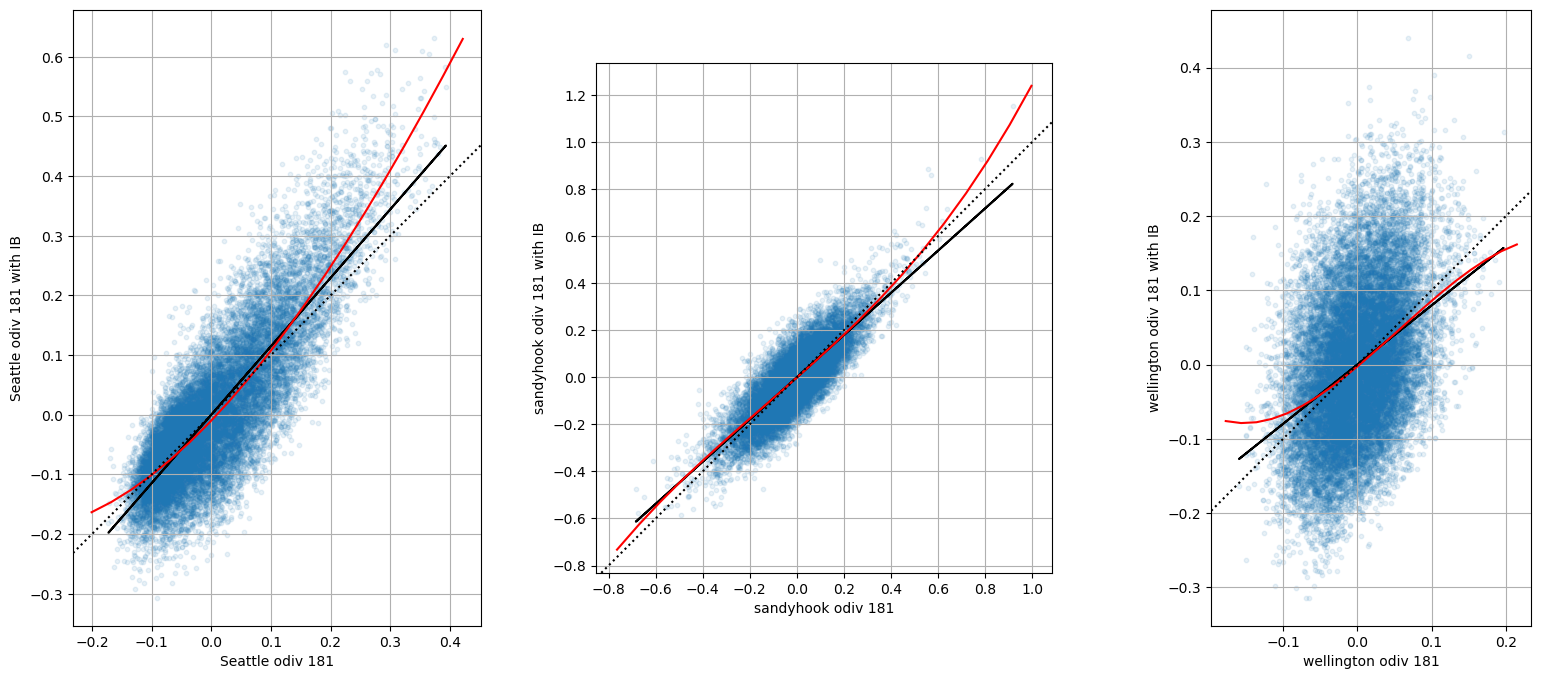

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(20,8))

axs[0].scatter(seattle_181, seattle_psl181, alpha=0.1, s=10)
x = np.polyfit(seattle_181, seattle_psl181, 1)
y = np.poly1d(x)
r2 = round(r2_score(seattle_psl181, y(seattle_181)),3)
axs[0].plot(seattle_181, y(seattle_181), color='black')
axs[0].set_xlabel("Seattle odiv 181")
axs[0].set_ylabel("Seattle odiv 181 with IB")
axs[0].set_aspect(aspect='equal')
axs[0].grid()
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(0.1)) 
axs[0].yaxis.set_major_locator(ticker.MultipleLocator(0.1)) 

x = np.polyfit(seattle_181, seattle_psl181, 3)
y = np.poly1d(x)
start, stop= axs[0].get_xlim()
num_points = 20
arbitrary_time = np.linspace(start, stop, num_points)
lon_intrp_2 = np.polyval(x, arbitrary_time)
axs[0].plot(arbitrary_time, lon_intrp_2, 'r')




axs[1].scatter(sandyhook_181, sandyhook_psl181, alpha=0.1, s=10)
x = np.polyfit(sandyhook_181, sandyhook_psl181, 1)
y = np.poly1d(x)
r2 = round(r2_score(sandyhook_psl181, y(sandyhook_181)),3)
axs[1].plot(sandyhook_181, y(sandyhook_181), color='black')
#text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n $r^2= {r2}$"
#axs[1].text(0.05, 0.95, text,transform=axs[1].transAxes,
#     fontsize=14, verticalalignment='top')
axs[1].set_xlabel("sandyhook odiv 181")
axs[1].set_ylabel("sandyhook odiv 181 with IB")
axs[1].set_aspect(aspect='equal')
axs[1].grid()
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(0.2)) 
axs[1].yaxis.set_major_locator(ticker.MultipleLocator(0.2)) 

x = np.polyfit(sandyhook_181, sandyhook_psl181, 3)
y = np.poly1d(x)
start, stop= axs[1].get_xlim()
num_points = 20
arbitrary_time = np.linspace(start, stop, num_points)
lon_intrp_2 = np.polyval(x, arbitrary_time)
axs[1].plot(arbitrary_time, lon_intrp_2, 'r')




axs[2].scatter(wellington_181, wellington_psl181, alpha=0.1, s=10)
x = np.polyfit(wellington_181, wellington_psl181, 1)
y = np.poly1d(x)
r2 = round(r2_score(wellington_psl181, y(wellington_181)),3)
axs[2].plot(wellington_181, y(wellington_181), color='black', label='Trendline')
#text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n $r^2= {r2}$"
#axs[2].text(0.05, 0.95, text,transform=axs[2].transAxes,
#     fontsize=14, verticalalignment='top')
axs[2].set_xlabel("wellington odiv 181")
axs[2].set_ylabel("wellington odiv 181 with IB")
axs[2].set_aspect(aspect='equal')
axs[2].grid()
axs[2].xaxis.set_major_locator(ticker.MultipleLocator(0.1)) 
axs[2].yaxis.set_major_locator(ticker.MultipleLocator(0.1)) 

x = np.polyfit(wellington_181, wellington_psl181, 3)
y = np.poly1d(x)
start, stop= axs[2].get_xlim()
num_points = 20
arbitrary_time = np.linspace(start, stop, num_points)
lon_intrp_2 = np.polyval(x, arbitrary_time)
axs[2].plot(arbitrary_time, lon_intrp_2, 'r')
#r2 = round(r2_score(wellington_psl181, y(wellington_181)),3)
#text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n $r^2= {r2}$"
#axs[2].text(0.05, 0.95, text,transform=axs[2].transAxes,
#     fontsize=14, verticalalignment='top')


#x = np.polyfit(extreme_181_nan, extreme_psl181_nan, 1)
#y = np.poly1d(x)
#r2 = round(r2_score(extreme_psl181_nan, y(extreme_181_nan)),3)
#axs[2].plot(extreme_181_nan, y(extreme_181_nan), color='black')
#text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n $r^2= {r2}$"
#axs[2].text(0.05, 0.95, text,transform=axs[2].transAxes,
 #    fontsize=14, verticalalignment='top')

axs[0].axline((0, 0), slope=1, color='black', linestyle='dotted')
axs[1].axline((0, 0), slope=1, color='black', linestyle='dotted')
axs[2].axline((0, 0), slope=1, color='black', linestyle='dotted', label='Trendline with no IB effect')

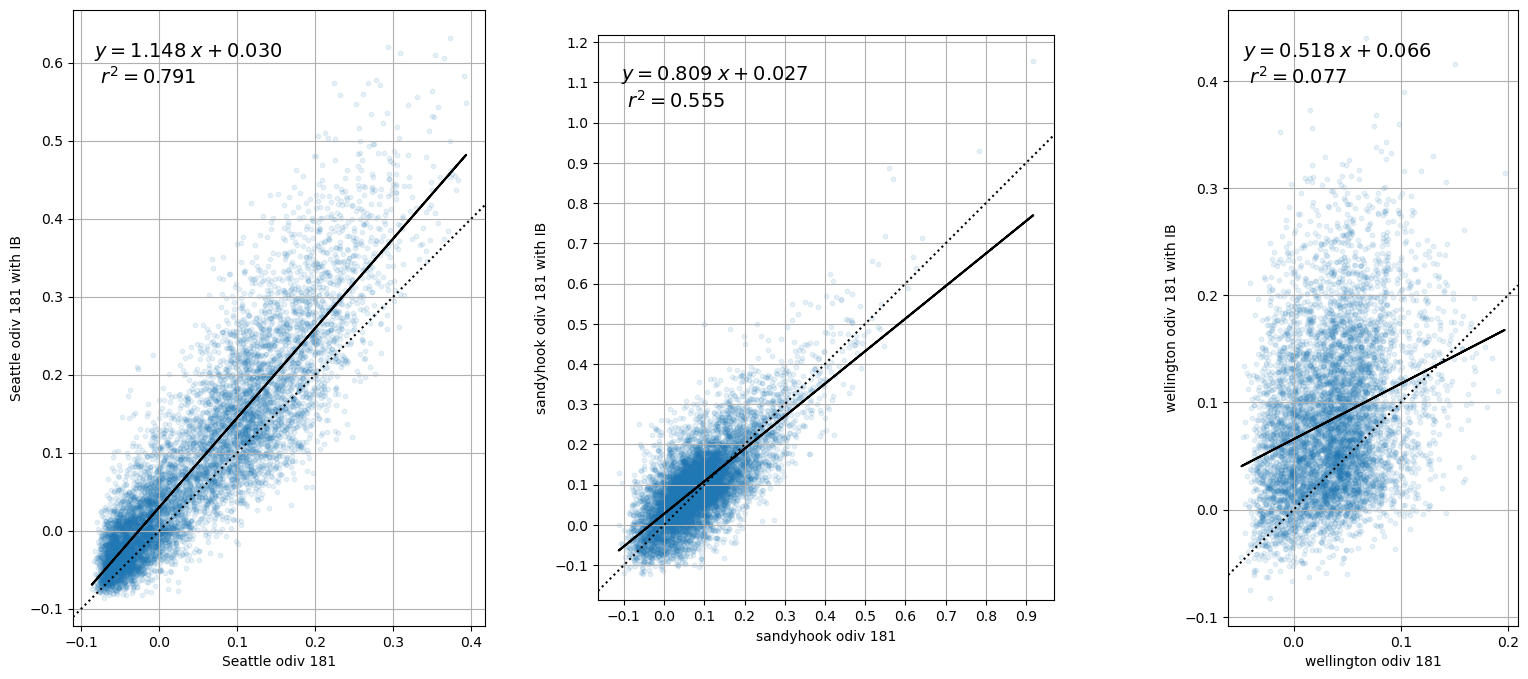

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(20,8))
#############################
seasonal_181_q80 = seattle_181.groupby(seattle_181.time.dt.dayofyear).quantile(0.50)
seasonal_psl181_q80 = seattle_psl181.groupby(seattle_psl181.time.dt.dayofyear).quantile(0.50)

seattle_181_extreme= seattle_181.where((seattle_181>=seasonal_181_q80[seattle_181.time.dt.dayofyear-1]) & (seattle_psl181>=seasonal_psl181_q80[seattle_psl181.time.dt.dayofyear-1]))
seattle_psl181_extreme= seattle_psl181.where((seattle_181>=seasonal_181_q80[seattle_181.time.dt.dayofyear-1]) & (seattle_psl181>=seasonal_psl181_q80[seattle_psl181.time.dt.dayofyear-1]))

extreme_nan= np.array(seattle_181_extreme)
extreme_181_nan=seattle_181_extreme[np.logical_not(np.isnan(extreme_nan))]

extreme_nan= np.array(seattle_psl181_extreme)
extreme_psl181_nan=seattle_psl181_extreme[np.logical_not(np.isnan(extreme_nan))]

axs[0].scatter(extreme_181_nan, extreme_psl181_nan, alpha=0.1, s=10)
x = np.polyfit(extreme_181_nan, extreme_psl181_nan, 1)
y = np.poly1d(x)
r2 = round(r2_score(extreme_psl181_nan, y(extreme_181_nan)),3)
axs[0].plot(extreme_181_nan, y(extreme_181_nan), color='black')
axs[0].set_xlabel("Seattle odiv 181")
axs[0].set_ylabel("Seattle odiv 181 with IB")
axs[0].set_aspect(aspect='equal')
axs[0].grid()
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(0.1)) 
axs[0].yaxis.set_major_locator(ticker.MultipleLocator(0.1)) 
text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n $r^2= {r2}$"
text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n $r^2= {r2}$"
axs[0].text(0.05, 0.95, text,transform=axs[0].transAxes,
     fontsize=14, verticalalignment='top')
########################################
seasonal_181_q80 = sandyhook_181.groupby(sandyhook_181.time.dt.dayofyear).quantile(0.50)
seasonal_psl181_q80 = sandyhook_psl181.groupby(sandyhook_psl181.time.dt.dayofyear).quantile(0.50)

sandyhook_181_extreme= sandyhook_181.where((sandyhook_181>=seasonal_181_q80[sandyhook_181.time.dt.dayofyear-1]) & (sandyhook_psl181>=seasonal_psl181_q80[sandyhook_psl181.time.dt.dayofyear-1]))
sandyhook_psl181_extreme= sandyhook_psl181.where((sandyhook_181>=seasonal_181_q80[sandyhook_181.time.dt.dayofyear-1]) & (sandyhook_psl181>=seasonal_psl181_q80[sandyhook_psl181.time.dt.dayofyear-1]))

extreme_nan= np.array(sandyhook_181_extreme)
extreme_181_nan=sandyhook_181_extreme[np.logical_not(np.isnan(extreme_nan))]

extreme_nan= np.array(sandyhook_psl181_extreme)
extreme_psl181_nan=sandyhook_psl181_extreme[np.logical_not(np.isnan(extreme_nan))]

axs[1].scatter(extreme_181_nan, extreme_psl181_nan, alpha=0.1, s=10)
x = np.polyfit(extreme_181_nan, extreme_psl181_nan, 1)
y = np.poly1d(x)
r2 = round(r2_score(extreme_psl181_nan, y(extreme_181_nan)),3)
axs[1].plot(extreme_181_nan, y(extreme_181_nan), color='black')
axs[1].set_xlabel("sandyhook odiv 181")
axs[1].set_ylabel("sandyhook odiv 181 with IB")
axs[1].set_aspect(aspect='equal')
axs[1].grid()
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(0.1)) 
axs[1].yaxis.set_major_locator(ticker.MultipleLocator(0.1)) 
text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n $r^2= {r2}$"
text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n $r^2= {r2}$"
axs[1].text(0.05, 0.95, text,transform=axs[1].transAxes,
     fontsize=14, verticalalignment='top')
##############################################
seasonal_181_q80 = wellington_181.groupby(wellington_181.time.dt.dayofyear).quantile(0.50)
seasonal_psl181_q80 = wellington_psl181.groupby(wellington_psl181.time.dt.dayofyear).quantile(0.50)

wellington_181_extreme= wellington_181.where((wellington_181>=seasonal_181_q80[wellington_181.time.dt.dayofyear-1]) & (wellington_psl181>=seasonal_psl181_q80[wellington_psl181.time.dt.dayofyear-1]))
wellington_psl181_extreme= wellington_psl181.where((wellington_181>=seasonal_181_q80[wellington_181.time.dt.dayofyear-1]) & (wellington_psl181>=seasonal_psl181_q80[wellington_psl181.time.dt.dayofyear-1]))

extreme_nan= np.array(wellington_181_extreme)
extreme_181_nan=wellington_181_extreme[np.logical_not(np.isnan(extreme_nan))]

extreme_nan= np.array(wellington_psl181_extreme)
extreme_psl181_nan=wellington_psl181_extreme[np.logical_not(np.isnan(extreme_nan))]

axs[2].scatter(extreme_181_nan, extreme_psl181_nan, alpha=0.1, s=10)
x = np.polyfit(extreme_181_nan, extreme_psl181_nan, 1)
y = np.poly1d(x)
r2 = round(r2_score(extreme_psl181_nan, y(extreme_181_nan)),3)
axs[2].plot(extreme_181_nan, y(extreme_181_nan), color='black')
axs[2].set_xlabel("wellington odiv 181")
axs[2].set_ylabel("wellington odiv 181 with IB")
axs[2].set_aspect(aspect='equal')
axs[2].grid()
axs[2].xaxis.set_major_locator(ticker.MultipleLocator(0.1)) 
axs[2].yaxis.set_major_locator(ticker.MultipleLocator(0.1)) 
text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n $r^2= {r2}$"
axs[2].text(0.05, 0.95, text,transform=axs[2].transAxes,
     fontsize=14, verticalalignment='top')


axs[0].axline((0, 0), slope=1, color='black', linestyle='dotted')
axs[1].axline((0, 0), slope=1, color='black', linestyle='dotted')
axs[2].axline((0, 0), slope=1, color='black', linestyle='dotted', label='Trendline with no IB effect')

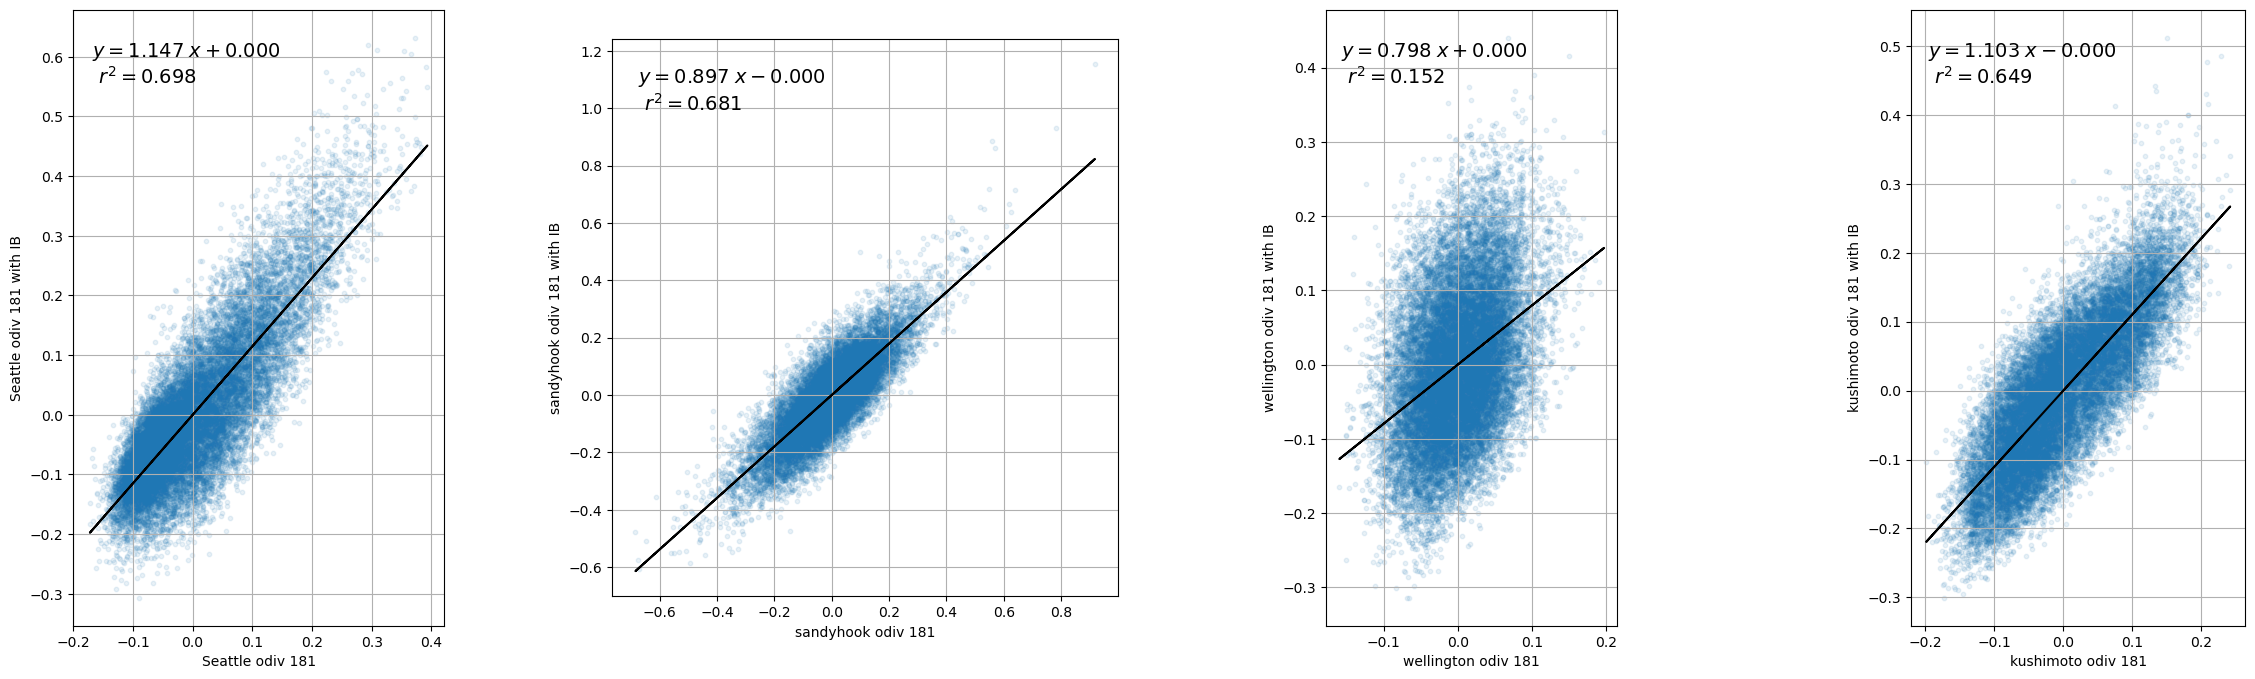

In [ ]:
axs[3].scatter(kushimoto_181, kushimoto_psl181, alpha=0.1, s=10)
x = np.polyfit(kushimoto_181, kushimoto_psl181, 1)
y = np.poly1d(x)
r2 = round(r2_score(kushimoto_psl181, y(kushimoto_181)),3)
axs[3].plot(kushimoto_181, y(kushimoto_181), color='black')
text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n $r^2= {r2}$"
axs[3].text(0.05, 0.95, text,transform=axs[3].transAxes,
     fontsize=14, verticalalignment='top')
axs[3].set_xlabel("kushimoto odiv 181")
axs[3].set_ylabel("kushimoto odiv 181 with IB")
axs[3].set_aspect(aspect='equal')
axs[3].grid()
axs[3].xaxis.set_major_locator(ticker.MultipleLocator(0.1)) 
axs[3].yaxis.set_major_locator(ticker.MultipleLocator(0.1)) 

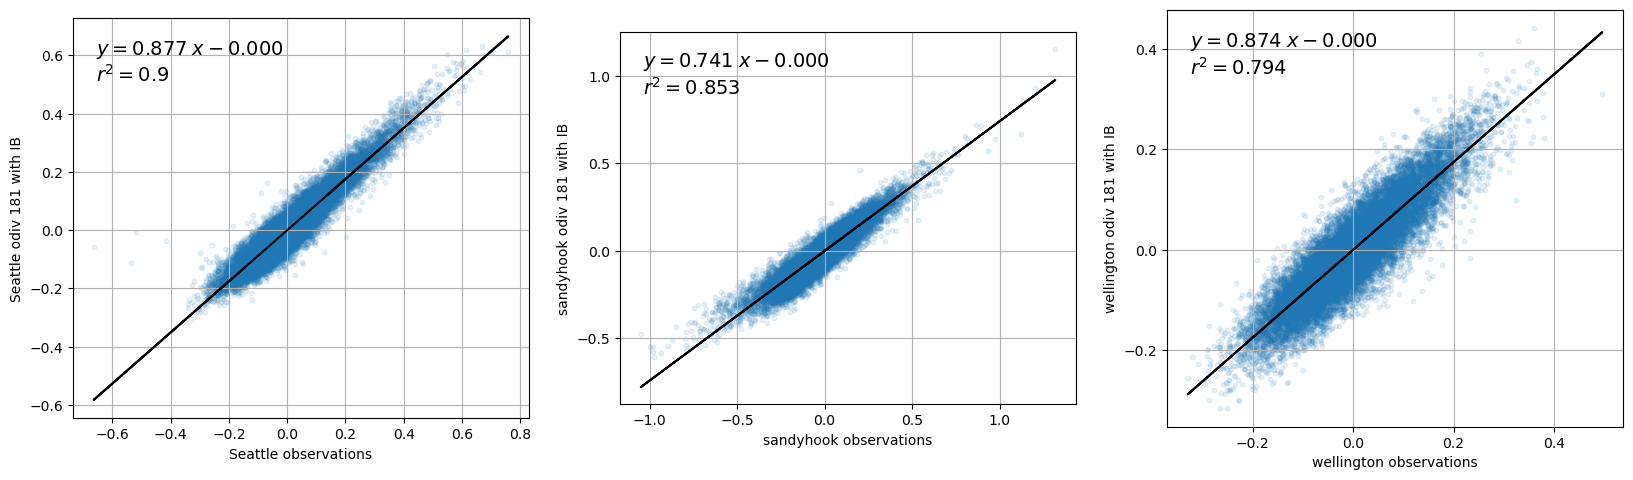

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(20,8))

axs[0].scatter( seattle_obs.sealevel_tr,seattle_psl181, s=10, alpha=0.1)
seattle= np.array(seattle_obs.sealevel_tr)
seattle_obs_nan=seattle[np.logical_not(np.isnan(seattle))]
seattle_psl181_nan=seattle_psl181[np.logical_not(np.isnan(seattle))]
seattle_psl181_nan=seattle_psl181_nan-seattle_psl181_nan.mean()
seattle_obs_nan=seattle_obs_nan-seattle_obs_nan.mean()
x = np.polyfit(seattle_obs_nan, seattle_psl181_nan, 1)
y = np.poly1d(x)
r2 = round(r2_score(seattle_psl181_nan, y(seattle_obs_nan)),3)
axs[0].plot(seattle_obs_nan, y(seattle_obs_nan), color='black')
text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n$r^2={r2}$"
axs[0].text(0.05, 0.95, text,transform=axs[0].transAxes,
     fontsize=14, verticalalignment='top')
axs[0].set_ylabel("Seattle odiv 181 with IB")
axs[0].set_xlabel("Seattle observations")
axs[0].set_aspect(aspect='equal')
axs[0].grid()
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(0.2)) 
axs[0].yaxis.set_major_locator(ticker.MultipleLocator(0.2)) 

axs[1].scatter( sandyhook_obs.sealevel_tr,sandyhook_psl181, s=10, alpha=0.1)
sandyhook= np.array(sandyhook_obs.sealevel_tr)
sandyhook_obs_nan=sandyhook[np.logical_not(np.isnan(sandyhook))]
sandyhook_psl181_nan=sandyhook_psl181[np.logical_not(np.isnan(sandyhook))]
sandyhook_psl181_nan=sandyhook_psl181_nan-sandyhook_psl181_nan.mean()
sandyhook_obs_nan=sandyhook_obs_nan-sandyhook_obs_nan.mean()
x = np.polyfit(sandyhook_obs_nan, sandyhook_psl181_nan, 1)
y = np.poly1d(x)
r2 = round(r2_score(sandyhook_psl181_nan, y(sandyhook_obs_nan)),3)
axs[1].plot(sandyhook_obs_nan, y(sandyhook_obs_nan), color='black')
text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n$r^2={r2}$"
axs[1].text(0.05, 0.95, text,transform=axs[1].transAxes,
     fontsize=14, verticalalignment='top')
axs[1].set_ylabel("sandyhook odiv 181 with IB")
axs[1].set_xlabel("sandyhook observations")
axs[1].set_aspect(aspect='equal')
axs[1].grid()
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(0.5)) 
axs[1].yaxis.set_major_locator(ticker.MultipleLocator(0.5)) 


axs[2].scatter( wellington_obs.sealevel_tr,wellington_psl181, s=10, alpha=0.1)
wellington= np.array(wellington_obs.sealevel_tr)
wellington_obs_nan=wellington[np.logical_not(np.isnan(wellington))]
wellington_psl181_nan=wellington_psl181[np.logical_not(np.isnan(wellington))]
wellington_psl181_nan=wellington_psl181_nan-wellington_psl181_nan.mean()
wellington_obs_nan=wellington_obs_nan-wellington_obs_nan.mean()
x = np.polyfit(wellington_obs_nan, wellington_psl181_nan, 1)
y = np.poly1d(x)
r2 = round(r2_score(wellington_psl181_nan, y(wellington_obs_nan)),3)
axs[2].plot(wellington_obs_nan, y(wellington_obs_nan), color='black')
text = f"$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n$r^2={r2}$"
axs[2].text(0.05, 0.95, text,transform=axs[2].transAxes,
     fontsize=14, verticalalignment='top')
axs[2].set_ylabel("wellington odiv 181 with IB")
axs[2].set_xlabel("wellington observations")
axs[2].set_aspect(aspect='equal')
axs[2].grid()
axs[2].xaxis.set_major_locator(ticker.MultipleLocator(0.2)) 
axs[2].yaxis.set_major_locator(ticker.MultipleLocator(0.2)) 


/vftmp/Olivia.Mcredmond/pid170511/ipykernel_107062/3214255218.py:63: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myTable1.add_row(["Observations",f"{round(float(seattle_obs.sealevel_tr.mean()), 3)}", f"{round(float(seattle_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(seattle_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(seattle_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(seattle_obs.sealevel_tr.quantile(0.99)),3)}"])


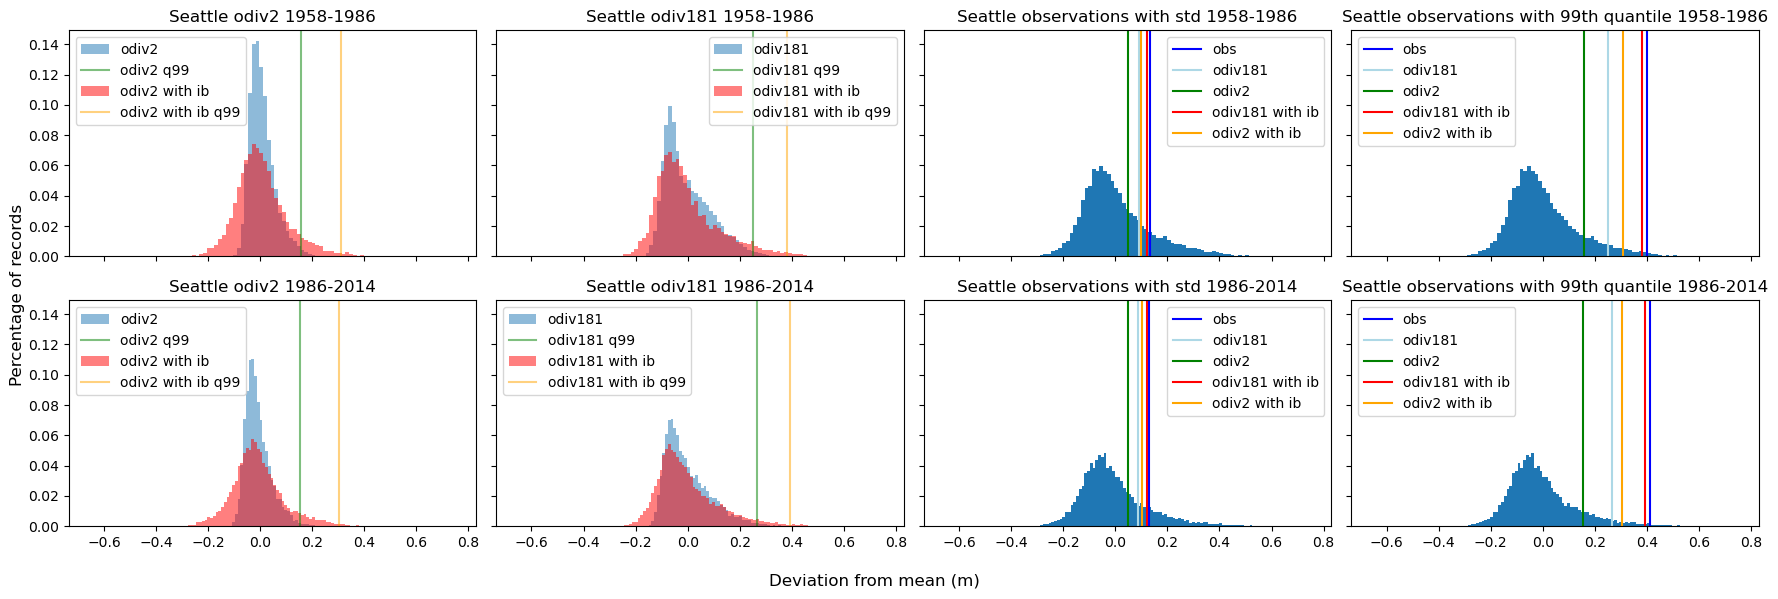

+------------------+--------+---------------------+-------+----------+---------------+
|   Data Origin    |  Mean  | Standadrd Deviation |  Skew | Kurtosis | 99th Quantile |
+------------------+--------+---------------------+-------+----------+---------------+
|     Odiv 181     | -0.001 |        0.089        | 0.892 |  0.306   |     0.249     |
|      Odiv 2      | 0.008  |        0.048        | 1.047 |  1.423   |     0.157     |
| Odiv 181 with IB |  0.0   |        0.122        | 0.796 |  1.343   |     0.381     |
|  Odiv 2 with IB  | 0.007  |        0.099        | 1.144 |  1.364   |     0.309     |
|   Observations   |  -0.0  |        0.131        | 1.064 |  1.669   |     0.409     |
+------------------+--------+---------------------+-------+----------+---------------+
+------------------+--------+---------------------+-------+----------+---------------+
|   Data Origin    |  Mean  | Standadrd Deviation |  Skew | Kurtosis | 99th Quantile |
+------------------+--------+--------------

/vftmp/Olivia.Mcredmond/pid170511/ipykernel_107062/3214255218.py:129: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myTable2.add_row(["Observations",f"{round(float(seattle_obs.sealevel_tr.mean()), 3)}", f"{round(float(seattle_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(seattle_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(seattle_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(seattle_obs.sealevel_tr.quantile(0.99)),3)}"])


In [13]:
year_start= 1958
year_end= 1986

seattle_2_pt1= seattle_2.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
seattle_181_pt1= seattle_181.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
seattle_psl2_pt1 =(seattle_psl2.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31")))
seattle_psl181_pt1=(seattle_psl181.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31")))

seattle_obs_pt1=seattle_obs.sel(datetime=slice(f"{year_start}-01-01", f"{year_end}-12-31"))

bins=np.linspace(np.float64(seattle_obs_pt1.sealevel_tr.min()),np.float64(seattle_obs_pt1.sealevel_tr.max()), 100)
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, tight_layout=True, figsize=(18,6))

axs[0][0].hist(seattle_2_pt1, bins=bins, weights=1/len(seattle_2_pt1) * np.ones(len(seattle_2_pt1)),alpha=0.5, label='odiv2')
axs[0][0].axvline(seattle_2_pt1.quantile(0.99), alpha=0.5, color='green', label='odiv2 q99')
axs[0][0].set_title(f'Seattle odiv2 {year_start}-{year_end}')

axs[0][0].hist(seattle_psl2_pt1, bins=bins, weights=1/len(seattle_psl2_pt1) * np.ones(len(seattle_psl2_pt1)), color='red',alpha=0.5,  label='odiv2 with ib')
axs[0][0].axvline(seattle_psl2_pt1.quantile(0.99), alpha=0.5, color='orange', label='odiv2 with ib q99')
axs[0][0].set_title(f'Seattle odiv2 {year_start}-{year_end}')
axs[0][0].legend()

axs[0][1].hist(seattle_181_pt1, bins=bins, weights=1/len(seattle_181_pt1) * np.ones(len(seattle_181_pt1)),alpha=0.5, label='odiv181')
axs[0][1].axvline(seattle_181_pt1.quantile(0.99), alpha=0.5, color='green',  label='odiv181 q99')
axs[0][1].set_title(f'Seattle odiv181{year_start}-{year_end}')

axs[0][1].hist(seattle_psl181_pt1, bins=bins, color='red',alpha=0.5, weights=1/len(seattle_psl181_pt1) * np.ones(len(seattle_psl181_pt1)), label='odiv181 with ib')
axs[0][1].axvline(seattle_psl181_pt1.quantile(0.99), alpha=0.5, color='orange', label='odiv181 with ib q99')
axs[0][1].set_title(f'Seattle odiv181 {year_start}-{year_end}')
axs[0][1].legend()

axs[0][2].hist(seattle_obs_pt1.sealevel_tr, bins=bins, weights=1/len(seattle_obs_pt1.sealevel_tr) * np.ones(len(seattle_obs_pt1.sealevel_tr)))
axs[0][2].set_title(f'Seattle observations with std {year_start}-{year_end}')

axs[0][2].axvline(seattle_obs_pt1.sealevel_tr.std(), color='blue', label='obs')
axs[0][2].axvline(seattle_181_pt1.std(), color='lightblue', label='odiv181')
axs[0][2].axvline(seattle_2_pt1.std(), color='green', label='odiv2')
axs[0][2].axvline(seattle_psl181_pt1.std(), color='red', label='odiv181 with ib')
axs[0][2].axvline(seattle_psl2_pt1.std(), color='orange',label='odiv2 with ib')
axs[0][2].legend()

axs[0][3].hist(seattle_obs_pt1.sealevel_tr, bins=bins, weights=1/len(seattle_obs_pt1.sealevel_tr) * np.ones(len(seattle_obs_pt1.sealevel_tr)))
axs[0][3].set_title(f'Seattle observations with 99th quantile {year_start}-{year_end}')

axs[0][3].axvline(seattle_obs_pt1.sealevel_tr.quantile(0.99), color='blue', label='obs')
axs[0][3].axvline(seattle_181_pt1.quantile(0.99), color='lightblue', label='odiv181')
axs[0][3].axvline(seattle_2_pt1.quantile(0.99), color='green', label='odiv2')
axs[0][3].axvline(seattle_psl181_pt1.quantile(0.99), color='red', label='odiv181 with ib')
axs[0][3].axvline(seattle_psl2_pt1.quantile(0.99), color='orange',label='odiv2 with ib')
axs[0][3].legend()

fig.supylabel('Percentage of records')
fig.supxlabel('Deviation from mean (m)')

# Specify the Column Names while initializing the Table 
myTable1 = PrettyTable(["Figure Source", "Mean (m) ", "Standard Deviation (m) ", "Skew", "Kurtosis", "99th Quantile (m) "]) 
 
# Add rows 
myTable1.add_row(["Odiv 181",f"{round(float(seattle_181_pt1.mean()), 3)}", f"{round(float(seattle_181_pt1.std()), 3)}", f"{round(float(skew(seattle_181_pt1, bias=False)), 3)}", f"{round(float(kurtosis(seattle_181_pt1, bias=False)), 3)}", f"{round(float(seattle_181_pt1.quantile(0.99)),3)}"]) 
myTable1.add_row(["Odiv 2",f"{round(float(seattle_2_pt1.mean()), 3)}",f"{round(float(seattle_2_pt1.std()), 3)}", f"{round(float(skew(seattle_2_pt1, bias=False)), 3)}", f"{round(float(kurtosis(seattle_2_pt1, bias=False)), 3)}", f"{round(float(seattle_2_pt1.quantile(0.99)),3)}"]) 
myTable1.add_row(["Odiv 181 with IB",f"{round(float(seattle_psl181_pt1.mean()), 3)}", f"{round(float(seattle_psl181_pt1.std()), 3)}", f"{round(float(skew(seattle_psl2_pt1, bias=False)), 3)}", f"{round(float(kurtosis(seattle_psl181_pt1, bias=False)), 3)}", f"{round(float(seattle_psl181_pt1.quantile(0.99)),3)}"]) 
myTable1.add_row(["Odiv 2 with IB",f"{round(float(seattle_psl2_pt1.mean()), 3)}", f"{round(float(seattle_psl2_pt1.std()), 3)}", f"{round(float(skew(seattle_psl181_pt1, bias=False)), 3)}", f"{round(float(kurtosis(seattle_psl2_pt1, bias=False)), 3)}", f"{round(float(seattle_psl2_pt1.quantile(0.99)),3)}"]) 
myTable1.add_row(["Observations",f"{round(float(seattle_obs.sealevel_tr.mean()), 3)}", f"{round(float(seattle_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(seattle_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(seattle_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(seattle_obs.sealevel_tr.quantile(0.99)),3)}"]) 

####################################################


year_start= 1986
year_end= 2014

seattle_2_pt1= seattle_2.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
seattle_181_pt1= seattle_181.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
seattle_psl2_pt1 =(seattle_psl2.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31")))
seattle_psl181_pt1=(seattle_psl181.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31")))
seattle_obs_pt1=seattle_obs.sel(datetime=slice(f"{year_start}-01-01", f"{year_end}-12-31"))

bins=np.linspace(np.float64(seattle_obs_pt1.sealevel_tr.min()),np.float64(seattle_obs_pt1.sealevel_tr.max()), 100)

axs[1][0].hist(seattle_2_pt1, bins=bins, weights=1/len(seattle_2_pt1) * np.ones(len(seattle_2_pt1)),alpha=0.5, label='odiv2')
axs[1][0].axvline(seattle_2_pt1.quantile(0.99), alpha=0.5, color='green', label='odiv2 q99')
axs[1][0].set_title(f'Seattle odiv2{year_start}-{year_end}')

axs[1][0].hist(seattle_psl2_pt1, bins=bins, weights=1/len(seattle_psl2_pt1) * np.ones(len(seattle_psl2_pt1)), color='red',alpha=0.5,  label='odiv2 with ib')
axs[1][0].axvline(seattle_psl2_pt1.quantile(0.99), alpha=0.5, color='orange', label='odiv2 with ib q99')
axs[1][0].set_title(f'Seattle odiv2 {year_start}-{year_end}')
axs[1][0].legend()

axs[1][1].hist(seattle_181_pt1, bins=bins, weights=1/len(seattle_181_pt1) * np.ones(len(seattle_181_pt1)),alpha=0.5, label='odiv181')
axs[1][1].axvline(seattle_181_pt1.quantile(0.99), alpha=0.5, color='green',  label='odiv181 q99')
axs[1][1].set_title(f'Seattle odiv181')

axs[1][1].hist(seattle_psl181_pt1, bins=bins, color='red',alpha=0.5, weights=1/len(seattle_psl181_pt1) * np.ones(len(seattle_psl181_pt1)), label='odiv181 with ib')
axs[1][1].axvline(seattle_psl181_pt1.quantile(0.99), alpha=0.5, color='orange', label='odiv181 with ib q99')
axs[1][1].set_title(f'Seattle odiv181 {year_start}-{year_end}')
axs[1][1].legend()

axs[1][2].hist(seattle_obs_pt1.sealevel_tr, bins=bins, weights=1/len(seattle_obs_pt1.sealevel_tr) * np.ones(len(seattle_obs_pt1.sealevel_tr)))
axs[1][2].set_title(f'Seattle observations with std {year_start}-{year_end}')

axs[1][2].axvline(seattle_obs_pt1.sealevel_tr.std(), color='blue', label='obs')
axs[1][2].axvline(seattle_181_pt1.std(), color='lightblue', label='odiv181')
axs[1][2].axvline(seattle_2_pt1.std(), color='green', label='odiv2')
axs[1][2].axvline(seattle_psl181_pt1.std(), color='red', label='odiv181 with ib')
axs[1][2].axvline(seattle_psl2_pt1.std(), color='orange',label='odiv2 with ib')
axs[1][2].legend()

axs[1][3].hist(seattle_obs_pt1.sealevel_tr, bins=bins, weights=1/len(seattle_obs_pt1.sealevel_tr) * np.ones(len(seattle_obs_pt1.sealevel_tr)))
axs[1][3].set_title(f'Seattle observations with 99th quantile {year_start}-{year_end}')

axs[1][3].axvline(seattle_obs_pt1.sealevel_tr.quantile(0.99), color='blue', label='obs')
axs[1][3].axvline(seattle_181_pt1.quantile(0.99), color='lightblue', label='odiv181')
axs[1][3].axvline(seattle_2_pt1.quantile(0.99), color='green', label='odiv2')
axs[1][3].axvline(seattle_psl181_pt1.quantile(0.99), color='red', label='odiv181 with ib')
axs[1][3].axvline(seattle_psl2_pt1.quantile(0.99), color='orange',label='odiv2 with ib')
axs[1][3].legend()

fig.supylabel('Percentage of records')
fig.supxlabel('Deviation from mean (m)')
plt.show()

# Specify the Column Names while initializing the Table 
myTable2 = PrettyTable(["Figure Source", "Mean (m) ", "Standard Deviation (m) ", "Skew", "Kurtosis", "99th Quantile (m) "]) 
 
# Add rows 
myTable2.add_row(["Odiv 181",f"{round(float(seattle_181_pt1.mean()), 3)}", f"{round(float(seattle_181_pt1.std()), 3)}", f"{round(float(skew(seattle_181_pt1, bias=False)), 3)}", f"{round(float(kurtosis(seattle_181_pt1, bias=False)), 3)}", f"{round(float(seattle_181_pt1.quantile(0.99)),3)}"]) 
myTable2.add_row(["Odiv 2",f"{round(float(seattle_2_pt1.mean()), 3)}",f"{round(float(seattle_2_pt1.std()), 3)}", f"{round(float(skew(seattle_2_pt1, bias=False)), 3)}", f"{round(float(kurtosis(seattle_2_pt1, bias=False)), 3)}", f"{round(float(seattle_2_pt1.quantile(0.99)),3)}"]) 
myTable2.add_row(["Odiv 181 with IB",f"{round(float(seattle_psl181_pt1.mean()), 3)}", f"{round(float(seattle_psl181_pt1.std()), 3)}", f"{round(float(skew(seattle_psl2_pt1, bias=False)), 3)}", f"{round(float(kurtosis(seattle_psl181_pt1, bias=False)), 3)}", f"{round(float(seattle_psl181_pt1.quantile(0.99)),3)}"]) 
myTable2.add_row(["Odiv 2 with IB",f"{round(float(seattle_psl2_pt1.mean()), 3)}", f"{round(float(seattle_psl2_pt1.std()), 3)}", f"{round(float(skew(seattle_psl181_pt1, bias=False)), 3)}", f"{round(float(kurtosis(seattle_psl2_pt1, bias=False)), 3)}", f"{round(float(seattle_psl2_pt1.quantile(0.99)),3)}"]) 
myTable2.add_row(["Observations",f"{round(float(seattle_obs.sealevel_tr.mean()), 3)}", f"{round(float(seattle_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(seattle_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(seattle_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(seattle_obs.sealevel_tr.quantile(0.99)),3)}"]) 

print(myTable1)
print(myTable2)



/vftmp/Olivia.Mcredmond/pid170511/ipykernel_107062/3528281487.py:61: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myTable1.add_row(["Observations",f"{round(float(sandyhook_obs.sealevel_tr.mean()), 3)}", f"{round(float(sandyhook_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(sandyhook_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(sandyhook_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(sandyhook_obs.sealevel_tr.quantile(0.99)),3)}"])


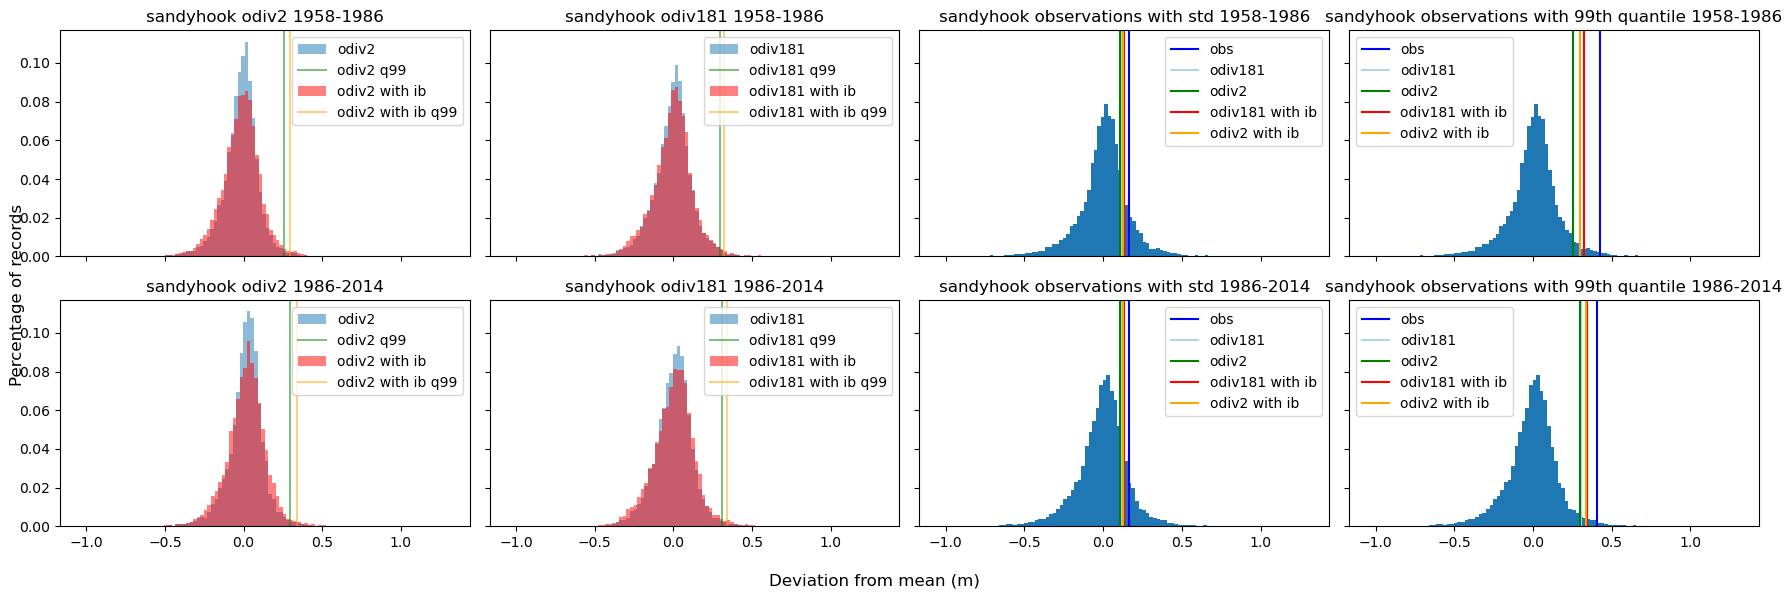

+------------------+--------+---------------------+--------+----------+---------------+
|   Data Origin    |  Mean  | Standadrd Deviation |  Skew  | Kurtosis | 99th Quantile |
+------------------+--------+---------------------+--------+----------+---------------+
|     Odiv 181     | -0.003 |        0.122        | -0.284 |  1.934   |     0.298     |
|      Odiv 2      | -0.016 |        0.108        | -0.479 |  2.549   |     0.257     |
| Odiv 181 with IB | -0.004 |         0.13        | -0.208 |   1.68   |     0.323     |
|  Odiv 2 with IB  | -0.016 |        0.123        | -0.085 |  1.686   |     0.298     |
|   Observations   |  0.0   |        0.162        | -0.284 |  3.497   |     0.422     |
+------------------+--------+---------------------+--------+----------+---------------+
+------------------+-------+---------------------+--------+----------+---------------+
|   Data Origin    |  Mean | Standadrd Deviation |  Skew  | Kurtosis | 99th Quantile |
+------------------+-------+------

/vftmp/Olivia.Mcredmond/pid170511/ipykernel_107062/3528281487.py:124: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myTable2.add_row(["Observations",f"{round(float(sandyhook_obs.sealevel_tr.mean()), 3)}", f"{round(float(sandyhook_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(sandyhook_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(sandyhook_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(sandyhook_obs.sealevel_tr.quantile(0.99)),3)}"])


In [16]:
year_start= 1958
year_end= 1986

sandyhook_2_pt1= sandyhook_2.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
sandyhook_181_pt1= sandyhook_181.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
sandyhook_psl2_pt1 =(sandyhook_psl2.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31")))
sandyhook_psl181_pt1=(sandyhook_psl181.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31")))
sandyhook_obs_pt1=sandyhook_obs.sel(datetime=slice(f"{year_start}-01-01", f"{year_end}-12-31"))

bins=np.linspace(np.float64(sandyhook_obs_pt1.sealevel_tr.min()),np.float64(sandyhook_obs_pt1.sealevel_tr.max()), 100)
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, tight_layout=True, figsize=(18,6))

axs[0][0].hist(sandyhook_2_pt1, bins=bins, weights=1/len(sandyhook_2_pt1) * np.ones(len(sandyhook_2_pt1)),alpha=0.5, label='odiv2')
axs[0][0].axvline(sandyhook_2_pt1.quantile(0.99), alpha=0.5, color='green', label='odiv2 q99')
axs[0][0].set_title(f'sandyhook odiv2 {year_start}-{year_end}')

axs[0][0].hist(sandyhook_psl2_pt1, bins=bins, weights=1/len(sandyhook_psl2_pt1) * np.ones(len(sandyhook_psl2_pt1)), color='red',alpha=0.5,  label='odiv2 with ib')
axs[0][0].axvline(sandyhook_psl2_pt1.quantile(0.99), alpha=0.5, color='orange', label='odiv2 with ib q99')
axs[0][0].set_title(f'sandyhook odiv2 {year_start}-{year_end}')
axs[0][0].legend()

axs[0][1].hist(sandyhook_181_pt1, bins=bins, weights=1/len(sandyhook_181_pt1) * np.ones(len(sandyhook_181_pt1)),alpha=0.5, label='odiv181')
axs[0][1].axvline(sandyhook_181_pt1.quantile(0.99), alpha=0.5, color='green',  label='odiv181 q99')
axs[0][1].set_title(f'sandyhook odiv181{year_start}-{year_end}')

axs[0][1].hist(sandyhook_psl181_pt1, bins=bins, color='red',alpha=0.5, weights=1/len(sandyhook_psl181_pt1) * np.ones(len(sandyhook_psl181_pt1)), label='odiv181 with ib')
axs[0][1].axvline(sandyhook_psl181_pt1.quantile(0.99), alpha=0.5, color='orange', label='odiv181 with ib q99')
axs[0][1].set_title(f'sandyhook odiv181 {year_start}-{year_end}')
axs[0][1].legend()

axs[0][2].hist(sandyhook_obs_pt1.sealevel_tr, bins=bins, weights=1/len(sandyhook_obs_pt1.sealevel_tr) * np.ones(len(sandyhook_obs_pt1.sealevel_tr)))
axs[0][2].set_title(f'sandyhook observations with std {year_start}-{year_end}')

axs[0][2].axvline(sandyhook_obs_pt1.sealevel_tr.std(), color='blue', label='obs')
axs[0][2].axvline(sandyhook_181_pt1.std(), color='lightblue', label='odiv181')
axs[0][2].axvline(sandyhook_2_pt1.std(), color='green', label='odiv2')
axs[0][2].axvline(sandyhook_psl181_pt1.std(), color='red', label='odiv181 with ib')
axs[0][2].axvline(sandyhook_psl2_pt1.std(), color='orange',label='odiv2 with ib')
axs[0][2].legend()

axs[0][3].hist(sandyhook_obs_pt1.sealevel_tr, bins=bins, weights=1/len(sandyhook_obs_pt1.sealevel_tr) * np.ones(len(sandyhook_obs_pt1.sealevel_tr)))
axs[0][3].set_title(f'sandyhook observations with 99th quantile {year_start}-{year_end}')

axs[0][3].axvline(sandyhook_obs_pt1.sealevel_tr.quantile(0.99), color='blue', label='obs')
axs[0][3].axvline(sandyhook_181_pt1.quantile(0.99), color='lightblue', label='odiv181')
axs[0][3].axvline(sandyhook_2_pt1.quantile(0.99), color='green', label='odiv2')
axs[0][3].axvline(sandyhook_psl181_pt1.quantile(0.99), color='red', label='odiv181 with ib')
axs[0][3].axvline(sandyhook_psl2_pt1.quantile(0.99), color='orange',label='odiv2 with ib')
axs[0][3].legend()

fig.supylabel('Percentage of records')
fig.supxlabel('Deviation from mean (m)')

myTable1 = PrettyTable(["Figure Source", "Mean (m) ", "Standard Deviation (m) ", "Skew", "Kurtosis", "99th Quantile (m) "]) 
 
# Add rows 
myTable1.add_row(["Odiv 181",f"{round(float(sandyhook_181_pt1.mean()), 3)}", f"{round(float(sandyhook_181_pt1.std()), 3)}", f"{round(float(skew(sandyhook_181_pt1, bias=False)), 3)}", f"{round(float(kurtosis(sandyhook_181_pt1, bias=False)), 3)}", f"{round(float(sandyhook_181_pt1.quantile(0.99)),3)}"]) 
myTable1.add_row(["Odiv 2",f"{round(float(sandyhook_2_pt1.mean()), 3)}",f"{round(float(sandyhook_2_pt1.std()), 3)}", f"{round(float(skew(sandyhook_2_pt1, bias=False)), 3)}", f"{round(float(kurtosis(sandyhook_2_pt1, bias=False)), 3)}", f"{round(float(sandyhook_2_pt1.quantile(0.99)),3)}"]) 
myTable1.add_row(["Odiv 181 with IB",f"{round(float(sandyhook_psl181_pt1.mean()), 3)}", f"{round(float(sandyhook_psl181_pt1.std()), 3)}", f"{round(float(skew(sandyhook_psl2_pt1, bias=False)), 3)}", f"{round(float(kurtosis(sandyhook_psl181_pt1, bias=False)), 3)}", f"{round(float(sandyhook_psl181_pt1.quantile(0.99)),3)}"]) 
myTable1.add_row(["Odiv 2 with IB",f"{round(float(sandyhook_psl2_pt1.mean()), 3)}", f"{round(float(sandyhook_psl2_pt1.std()), 3)}", f"{round(float(skew(sandyhook_psl181_pt1, bias=False)), 3)}", f"{round(float(kurtosis(sandyhook_psl2_pt1, bias=False)), 3)}", f"{round(float(sandyhook_psl2_pt1.quantile(0.99)),3)}"]) 
myTable1.add_row(["Observations",f"{round(float(sandyhook_obs.sealevel_tr.mean()), 3)}", f"{round(float(sandyhook_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(sandyhook_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(sandyhook_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(sandyhook_obs.sealevel_tr.quantile(0.99)),3)}"]) 


year_start= 1986
year_end= 2014

sandyhook_2_pt1= sandyhook_2.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
sandyhook_181_pt1= sandyhook_181.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
sandyhook_psl2_pt1 =(sandyhook_psl2.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31")))
sandyhook_psl181_pt1=(sandyhook_psl181.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31")))
sandyhook_obs_pt1=sandyhook_obs.sel(datetime=slice(f"{year_start}-01-01", f"{year_end}-12-31"))

bins=np.linspace(np.float64(sandyhook_obs_pt1.sealevel_tr.min()),np.float64(sandyhook_obs_pt1.sealevel_tr.max()), 100)

axs[1][0].hist(sandyhook_2_pt1, bins=bins, weights=1/len(sandyhook_2_pt1) * np.ones(len(sandyhook_2_pt1)),alpha=0.5, label='odiv2')
axs[1][0].axvline(sandyhook_2_pt1.quantile(0.99), alpha=0.5, color='green', label='odiv2 q99')
axs[1][0].set_title(f'sandyhook odiv2{year_start}-{year_end}')

axs[1][0].hist(sandyhook_psl2_pt1, bins=bins, weights=1/len(sandyhook_psl2_pt1) * np.ones(len(sandyhook_psl2_pt1)), color='red',alpha=0.5,  label='odiv2 with ib')
axs[1][0].axvline(sandyhook_psl2_pt1.quantile(0.99), alpha=0.5, color='orange', label='odiv2 with ib q99')
axs[1][0].set_title(f'sandyhook odiv2 {year_start}-{year_end}')
axs[1][0].legend()

axs[1][1].hist(sandyhook_181_pt1, bins=bins, weights=1/len(sandyhook_181_pt1) * np.ones(len(sandyhook_181_pt1)),alpha=0.5, label='odiv181')
axs[1][1].axvline(sandyhook_181_pt1.quantile(0.99), alpha=0.5, color='green',  label='odiv181 q99')
axs[1][1].set_title(f'sandyhook odiv181')

axs[1][1].hist(sandyhook_psl181_pt1, bins=bins, color='red',alpha=0.5, weights=1/len(sandyhook_psl181_pt1) * np.ones(len(sandyhook_psl181_pt1)), label='odiv181 with ib')
axs[1][1].axvline(sandyhook_psl181_pt1.quantile(0.99), alpha=0.5, color='orange', label='odiv181 with ib q99')
axs[1][1].set_title(f'sandyhook odiv181 {year_start}-{year_end}')
axs[1][1].legend()

axs[1][2].hist(sandyhook_obs_pt1.sealevel_tr, bins=bins, weights=1/len(sandyhook_obs_pt1.sealevel_tr) * np.ones(len(sandyhook_obs_pt1.sealevel_tr)))
axs[1][2].set_title(f'sandyhook observations with std {year_start}-{year_end}')

axs[1][2].axvline(sandyhook_obs_pt1.sealevel_tr.std(), color='blue', label='obs')
axs[1][2].axvline(sandyhook_181_pt1.std(), color='lightblue', label='odiv181')
axs[1][2].axvline(sandyhook_2_pt1.std(), color='green', label='odiv2')
axs[1][2].axvline(sandyhook_psl181_pt1.std(), color='red', label='odiv181 with ib')
axs[1][2].axvline(sandyhook_psl2_pt1.std(), color='orange',label='odiv2 with ib')
axs[1][2].legend()

axs[1][3].hist(sandyhook_obs_pt1.sealevel_tr, bins=bins, weights=1/len(sandyhook_obs_pt1.sealevel_tr) * np.ones(len(sandyhook_obs_pt1.sealevel_tr)))
axs[1][3].set_title(f'sandyhook observations with 99th quantile {year_start}-{year_end}')

axs[1][3].axvline(sandyhook_obs_pt1.sealevel_tr.quantile(0.99), color='blue', label='obs')
axs[1][3].axvline(sandyhook_181_pt1.quantile(0.99), color='lightblue', label='odiv181')
axs[1][3].axvline(sandyhook_2_pt1.quantile(0.99), color='green', label='odiv2')
axs[1][3].axvline(sandyhook_psl181_pt1.quantile(0.99), color='red', label='odiv181 with ib')
axs[1][3].axvline(sandyhook_psl2_pt1.quantile(0.99), color='orange',label='odiv2 with ib')
axs[1][3].legend()

fig.supylabel('Percentage of records')
fig.supxlabel('Deviation from mean (m)')
plt.show()

myTable2 = PrettyTable(["Figure Source", "Mean (m) ", "Standard Deviation (m) ", "Skew", "Kurtosis", "99th Quantile (m) "]) 
 
# Add rows 
myTable2.add_row(["Odiv 181",f"{round(float(sandyhook_181_pt1.mean()), 3)}", f"{round(float(sandyhook_181_pt1.std()), 3)}", f"{round(float(skew(sandyhook_181_pt1, bias=False)), 3)}", f"{round(float(kurtosis(sandyhook_181_pt1, bias=False)), 3)}", f"{round(float(sandyhook_181_pt1.quantile(0.99)),3)}"]) 
myTable2.add_row(["Odiv 2",f"{round(float(sandyhook_2_pt1.mean()), 3)}",f"{round(float(sandyhook_2_pt1.std()), 3)}", f"{round(float(skew(sandyhook_2_pt1, bias=False)), 3)}", f"{round(float(kurtosis(sandyhook_2_pt1, bias=False)), 3)}", f"{round(float(sandyhook_2_pt1.quantile(0.99)),3)}"]) 
myTable2.add_row(["Odiv 181 with IB",f"{round(float(sandyhook_psl181_pt1.mean()), 3)}", f"{round(float(sandyhook_psl181_pt1.std()), 3)}", f"{round(float(skew(sandyhook_psl2_pt1, bias=False)), 3)}", f"{round(float(kurtosis(sandyhook_psl181_pt1, bias=False)), 3)}", f"{round(float(sandyhook_psl181_pt1.quantile(0.99)),3)}"]) 
myTable2.add_row(["Odiv 2 with IB",f"{round(float(sandyhook_psl2_pt1.mean()), 3)}", f"{round(float(sandyhook_psl2_pt1.std()), 3)}", f"{round(float(skew(sandyhook_psl181_pt1, bias=False)), 3)}", f"{round(float(kurtosis(sandyhook_psl2_pt1, bias=False)), 3)}", f"{round(float(sandyhook_psl2_pt1.quantile(0.99)),3)}"]) 
myTable2.add_row(["Observations",f"{round(float(sandyhook_obs.sealevel_tr.mean()), 3)}", f"{round(float(sandyhook_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(sandyhook_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(sandyhook_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(sandyhook_obs.sealevel_tr.quantile(0.99)),3)}"]) 

print(myTable1)
print(myTable2)

/vftmp/Olivia.Mcredmond/pid170511/ipykernel_107062/11076382.py:62: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myTable1.add_row(["Observations",f"{round(float(wellington_obs.sealevel_tr.mean()), 3)}", f"{round(float(wellington_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(wellington_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(wellington_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(wellington_obs.sealevel_tr.quantile(0.99)),3)}"])


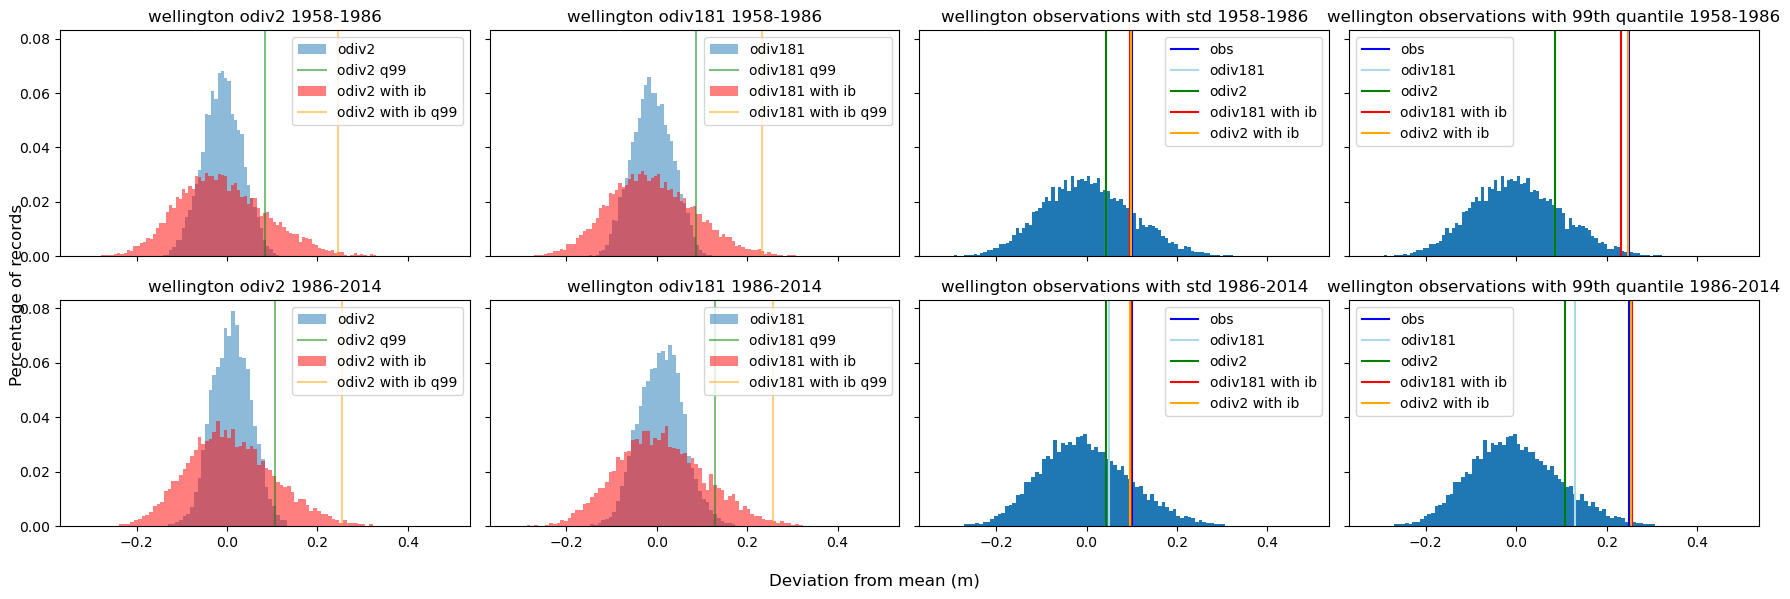

+------------------+--------+---------------------+--------+----------+---------------+
|   Data Origin    |  Mean  | Standadrd Deviation |  Skew  | Kurtosis | 99th Quantile |
+------------------+--------+---------------------+--------+----------+---------------+
|     Odiv 181     | -0.01  |        0.044        |  0.01  |  -0.329  |     0.086     |
|      Odiv 2      | -0.01  |        0.043        | -0.043 |  -0.208  |     0.085     |
| Odiv 181 with IB | -0.01  |        0.096        |  0.4   |  0.046   |     0.232     |
|  Odiv 2 with IB  | -0.009 |        0.099        | 0.301  |  0.134   |     0.246     |
|   Observations   |  0.0   |         0.1         | 0.261  |  -0.024  |     0.249     |
+------------------+--------+---------------------+--------+----------+---------------+
+------------------+-------+---------------------+--------+----------+---------------+
|   Data Origin    |  Mean | Standadrd Deviation |  Skew  | Kurtosis | 99th Quantile |
+------------------+-------+------

/vftmp/Olivia.Mcredmond/pid170511/ipykernel_107062/11076382.py:126: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myTable2.add_row(["Observations",f"{round(float(wellington_obs.sealevel_tr.mean()), 3)}", f"{round(float(wellington_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(wellington_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(wellington_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(wellington_obs.sealevel_tr.quantile(0.99)),3)}"])


In [15]:
year_start= 1958
year_end= 1986

wellington_2_pt1= wellington_2.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
wellington_181_pt1= wellington_181.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
wellington_psl2_pt1 =(wellington_psl2.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31")))
wellington_psl181_pt1=(wellington_psl181.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31")))

wellington_obs_pt1=wellington_obs.sel(datetime=slice(f"{year_start}-01-01", f"{year_end}-12-31"))

bins=np.linspace(np.float64(wellington_obs_pt1.sealevel_tr.min()),np.float64(wellington_obs_pt1.sealevel_tr.max()), 100)
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, tight_layout=True, figsize=(18,6))

axs[0][0].hist(wellington_2_pt1, bins=bins, weights=1/len(wellington_2_pt1) * np.ones(len(wellington_2_pt1)),alpha=0.5, label='odiv2')
axs[0][0].axvline(wellington_2_pt1.quantile(0.99), alpha=0.5, color='green', label='odiv2 q99')
axs[0][0].set_title(f'wellington odiv2 {year_start}-{year_end}')

axs[0][0].hist(wellington_psl2_pt1, bins=bins, weights=1/len(wellington_psl2_pt1) * np.ones(len(wellington_psl2_pt1)), color='red',alpha=0.5,  label='odiv2 with ib')
axs[0][0].axvline(wellington_psl2_pt1.quantile(0.99), alpha=0.5, color='orange', label='odiv2 with ib q99')
axs[0][0].set_title(f'wellington odiv2 {year_start}-{year_end}')
axs[0][0].legend()

axs[0][1].hist(wellington_181_pt1, bins=bins, weights=1/len(wellington_181_pt1) * np.ones(len(wellington_181_pt1)),alpha=0.5, label='odiv181')
axs[0][1].axvline(wellington_181_pt1.quantile(0.99), alpha=0.5, color='green',  label='odiv181 q99')
axs[0][1].set_title(f'wellington odiv181{year_start}-{year_end}')

axs[0][1].hist(wellington_psl181_pt1, bins=bins, color='red',alpha=0.5, weights=1/len(wellington_psl181_pt1) * np.ones(len(wellington_psl181_pt1)), label='odiv181 with ib')
axs[0][1].axvline(wellington_psl181_pt1.quantile(0.99), alpha=0.5, color='orange', label='odiv181 with ib q99')
axs[0][1].set_title(f'wellington odiv181 {year_start}-{year_end}')
axs[0][1].legend()

axs[0][2].hist(wellington_obs_pt1.sealevel_tr, bins=bins, weights=1/len(wellington_obs_pt1.sealevel_tr) * np.ones(len(wellington_obs_pt1.sealevel_tr)))
axs[0][2].set_title(f'wellington observations with std {year_start}-{year_end}')

axs[0][2].axvline(wellington_obs_pt1.sealevel_tr.std(), color='blue', label='obs')
axs[0][2].axvline(wellington_181_pt1.std(), color='lightblue', label='odiv181')
axs[0][2].axvline(wellington_2_pt1.std(), color='green', label='odiv2')
axs[0][2].axvline(wellington_psl181_pt1.std(), color='red', label='odiv181 with ib')
axs[0][2].axvline(wellington_psl2_pt1.std(), color='orange',label='odiv2 with ib')
axs[0][2].legend()

axs[0][3].hist(wellington_obs_pt1.sealevel_tr, bins=bins, weights=1/len(wellington_obs_pt1.sealevel_tr) * np.ones(len(wellington_obs_pt1.sealevel_tr)))
axs[0][3].set_title(f'wellington observations with 99th quantile {year_start}-{year_end}')

axs[0][3].axvline(wellington_obs_pt1.sealevel_tr.quantile(0.99), color='blue', label='obs')
axs[0][3].axvline(wellington_181_pt1.quantile(0.99), color='lightblue', label='odiv181')
axs[0][3].axvline(wellington_2_pt1.quantile(0.99), color='green', label='odiv2')
axs[0][3].axvline(wellington_psl181_pt1.quantile(0.99), color='red', label='odiv181 with ib')
axs[0][3].axvline(wellington_psl2_pt1.quantile(0.99), color='orange',label='odiv2 with ib')
axs[0][3].legend()

fig.supylabel('Percentage of records')
fig.supxlabel('Deviation from mean (m)')

myTable1 = PrettyTable(["Figure Source", "Mean (m) ", "Standard Deviation (m) ", "Skew", "Kurtosis", "99th Quantile (m) "]) 
 
# Add rows 
myTable1.add_row(["Odiv 181",f"{round(float(wellington_181_pt1.mean()), 3)}", f"{round(float(wellington_181_pt1.std()), 3)}", f"{round(float(skew(wellington_181_pt1, bias=False)), 3)}", f"{round(float(kurtosis(wellington_181_pt1, bias=False)), 3)}", f"{round(float(wellington_181_pt1.quantile(0.99)),3)}"]) 
myTable1.add_row(["Odiv 2",f"{round(float(wellington_2_pt1.mean()), 3)}",f"{round(float(wellington_2_pt1.std()), 3)}", f"{round(float(skew(wellington_2_pt1, bias=False)), 3)}", f"{round(float(kurtosis(wellington_2_pt1, bias=False)), 3)}", f"{round(float(wellington_2_pt1.quantile(0.99)),3)}"]) 
myTable1.add_row(["Odiv 181 with IB",f"{round(float(wellington_psl181_pt1.mean()), 3)}", f"{round(float(wellington_psl181_pt1.std()), 3)}", f"{round(float(skew(wellington_psl2_pt1, bias=False)), 3)}", f"{round(float(kurtosis(wellington_psl181_pt1, bias=False)), 3)}", f"{round(float(wellington_psl181_pt1.quantile(0.99)),3)}"]) 
myTable1.add_row(["Odiv 2 with IB",f"{round(float(wellington_psl2_pt1.mean()), 3)}", f"{round(float(wellington_psl2_pt1.std()), 3)}", f"{round(float(skew(wellington_psl181_pt1, bias=False)), 3)}", f"{round(float(kurtosis(wellington_psl2_pt1, bias=False)), 3)}", f"{round(float(wellington_psl2_pt1.quantile(0.99)),3)}"]) 
myTable1.add_row(["Observations",f"{round(float(wellington_obs.sealevel_tr.mean()), 3)}", f"{round(float(wellington_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(wellington_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(wellington_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(wellington_obs.sealevel_tr.quantile(0.99)),3)}"]) 


year_start= 1986
year_end= 2014

wellington_2_pt1= wellington_2.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
wellington_181_pt1= wellington_181.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31"))
wellington_psl2_pt1 =(wellington_psl2.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31")))
wellington_psl181_pt1=(wellington_psl181.sel(time=slice(f"{year_start}-01-01", f"{year_end}-12-31")))
wellington_obs_pt1=wellington_obs.sel(datetime=slice(f"{year_start}-01-01", f"{year_end}-12-31"))

bins=np.linspace(np.float64(wellington_obs_pt1.sealevel_tr.min()),np.float64(wellington_obs_pt1.sealevel_tr.max()), 100)

axs[1][0].hist(wellington_2_pt1, bins=bins, weights=1/len(wellington_2_pt1) * np.ones(len(wellington_2_pt1)),alpha=0.5, label='odiv2')
axs[1][0].axvline(wellington_2_pt1.quantile(0.99), alpha=0.5, color='green', label='odiv2 q99')
axs[1][0].set_title(f'wellington odiv2{year_start}-{year_end}')

axs[1][0].hist(wellington_psl2_pt1, bins=bins, weights=1/len(wellington_psl2_pt1) * np.ones(len(wellington_psl2_pt1)), color='red',alpha=0.5,  label='odiv2 with ib')
axs[1][0].axvline(wellington_psl2_pt1.quantile(0.99), alpha=0.5, color='orange', label='odiv2 with ib q99')
axs[1][0].set_title(f'wellington odiv2 {year_start}-{year_end}')
axs[1][0].legend()

axs[1][1].hist(wellington_181_pt1, bins=bins, weights=1/len(wellington_181_pt1) * np.ones(len(wellington_181_pt1)),alpha=0.5, label='odiv181')
axs[1][1].axvline(wellington_181_pt1.quantile(0.99), alpha=0.5, color='green',  label='odiv181 q99')
axs[1][1].set_title(f'wellington odiv181')

axs[1][1].hist(wellington_psl181_pt1, bins=bins, color='red',alpha=0.5, weights=1/len(wellington_psl181_pt1) * np.ones(len(wellington_psl181_pt1)), label='odiv181 with ib')
axs[1][1].axvline(wellington_psl181_pt1.quantile(0.99), alpha=0.5, color='orange', label='odiv181 with ib q99')
axs[1][1].set_title(f'wellington odiv181 {year_start}-{year_end}')
axs[1][1].legend()

axs[1][2].hist(wellington_obs_pt1.sealevel_tr, bins=bins, weights=1/len(wellington_obs_pt1.sealevel_tr) * np.ones(len(wellington_obs_pt1.sealevel_tr)))
axs[1][2].set_title(f'wellington observations with std {year_start}-{year_end}')

axs[1][2].axvline(wellington_obs_pt1.sealevel_tr.std(), color='blue', label='obs')
axs[1][2].axvline(wellington_181_pt1.std(), color='lightblue', label='odiv181')
axs[1][2].axvline(wellington_2_pt1.std(), color='green', label='odiv2')
axs[1][2].axvline(wellington_psl181_pt1.std(), color='red', label='odiv181 with ib')
axs[1][2].axvline(wellington_psl2_pt1.std(), color='orange',label='odiv2 with ib')
axs[1][2].legend()

axs[1][3].hist(wellington_obs_pt1.sealevel_tr, bins=bins, weights=1/len(wellington_obs_pt1.sealevel_tr) * np.ones(len(wellington_obs_pt1.sealevel_tr)))
axs[1][3].set_title(f'wellington observations with 99th quantile {year_start}-{year_end}')

axs[1][3].axvline(wellington_obs_pt1.sealevel_tr.quantile(0.99), color='blue', label='obs')
axs[1][3].axvline(wellington_181_pt1.quantile(0.99), color='lightblue', label='odiv181')
axs[1][3].axvline(wellington_2_pt1.quantile(0.99), color='green', label='odiv2')
axs[1][3].axvline(wellington_psl181_pt1.quantile(0.99), color='red', label='odiv181 with ib')
axs[1][3].axvline(wellington_psl2_pt1.quantile(0.99), color='orange',label='odiv2 with ib')
axs[1][3].legend()

fig.supylabel('Percentage of records')
fig.supxlabel('Deviation from mean (m)')
plt.show()

# Specify the Column Names while initializing the Table 
myTable2 = PrettyTable(["Figure Source", "Mean (m) ", "Standard Deviation (m) ", "Skew", "Kurtosis", "99th Quantile (m) "]) 
 
# Add rows 
myTable2.add_row(["Odiv 181",f"{round(float(wellington_181_pt1.mean()), 3)}", f"{round(float(wellington_181_pt1.std()), 3)}", f"{round(float(skew(wellington_181_pt1, bias=False)), 3)}", f"{round(float(kurtosis(wellington_181_pt1, bias=False)), 3)}", f"{round(float(wellington_181_pt1.quantile(0.99)),3)}"]) 
myTable2.add_row(["Odiv 2",f"{round(float(wellington_2_pt1.mean()), 3)}",f"{round(float(wellington_2_pt1.std()), 3)}", f"{round(float(skew(wellington_2_pt1, bias=False)), 3)}", f"{round(float(kurtosis(wellington_2_pt1, bias=False)), 3)}", f"{round(float(wellington_2_pt1.quantile(0.99)),3)}"]) 
myTable2.add_row(["Odiv 181 with IB",f"{round(float(wellington_psl181_pt1.mean()), 3)}", f"{round(float(wellington_psl181_pt1.std()), 3)}", f"{round(float(skew(wellington_psl2_pt1, bias=False)), 3)}", f"{round(float(kurtosis(wellington_psl181_pt1, bias=False)), 3)}", f"{round(float(wellington_psl181_pt1.quantile(0.99)),3)}"]) 
myTable2.add_row(["Odiv 2 with IB",f"{round(float(wellington_psl2_pt1.mean()), 3)}", f"{round(float(wellington_psl2_pt1.std()), 3)}", f"{round(float(skew(wellington_psl181_pt1, bias=False)), 3)}", f"{round(float(kurtosis(wellington_psl2_pt1, bias=False)), 3)}", f"{round(float(wellington_psl2_pt1.quantile(0.99)),3)}"]) 
myTable2.add_row(["Observations",f"{round(float(wellington_obs.sealevel_tr.mean()), 3)}", f"{round(float(wellington_obs.sealevel_tr.std()), 3)}", f"{round(float(pd.DataFrame(wellington_obs.sealevel_tr).skew()), 3)}", f"{round(float(pd.DataFrame(wellington_obs.sealevel_tr).kurtosis()), 3)}", f"{round(float(wellington_obs.sealevel_tr.quantile(0.99)),3)}"]) 

print(myTable1)
print(myTable2)